In [17]:
import pandas as pd

In [18]:
# save_path = "/media/omid/HDD2/QM9_sci/test/"
save_path = "/media/omid/HDD2/QM9_sci/new250203/"

In [19]:
ht = pd.read_csv(save_path + "StackingRegressor_homo_test_actual_vs_predicted_51_QM9.csv")
lt = pd.read_csv(save_path + "StackingRegressor_lumo_test_actual_vs_predicted_51_QM9.csv")
ht.head(), lt.head()

(    Index    Actual  Predicted
 0   26438  0.203483   0.203466
 1  116671  1.117747   1.117792
 2   38473 -0.587554  -0.587552
 3   19339  0.398261   0.398282
 4   79733 -0.261599  -0.261550,
     Index    Actual  Predicted
 0   26438  1.269129   1.269157
 1  116671 -0.619797  -0.619772
 2   38473 -1.300131  -1.300184
 3   19339 -0.035511  -0.035506
 4   79733 -2.136541  -2.136569)

## Merging HOMO and LUMO Predictions for "test" dataset

In [20]:
# Read the data from CSV files
# df_hts = pd.read_csv(save_path + "StackingRegressor_homo_test_actual_vs_predicted.csv")
# df_lts = pd.read_csv(save_path + "StackingRegressor_lumo_test_actual_vs_predicted.csv")
df_hts = pd.read_csv(save_path + "StackingRegressor_homo_test_actual_vs_predicted_51_QM9.csv")
df_lts = pd.read_csv(save_path + "StackingRegressor_lumo_test_actual_vs_predicted_51_QM9.csv")

# Renaming columns to distinguish between the two dataframes
df_hts = df_hts.rename(columns={'Actual': 'Actual_hts', 'Predicted': 'Predicted_hts'})
df_lts = df_lts.rename(columns={'Actual': 'Actual_lts', 'Predicted': 'Predicted_lts'})

# Merging dataframes on 'Index'
df_combined = pd.merge(df_hts, df_lts, on='Index')

# Calculating differences
df_combined['Actual_gap'] = df_combined['Actual_lts'] - df_combined['Actual_hts']
df_combined['Predicted_gap'] = df_combined['Predicted_lts'] - df_combined['Predicted_hts']

# Selecting the final columns
df_combined = df_combined[['Index', 'Actual_hts', 'Predicted_hts', 'Actual_lts', 'Predicted_lts', 
                           'Actual_gap', 'Predicted_gap']]

# df_combined.to_csv(save_path + 'StackingRegressor_Actual_Predicted_h_l_test_51_QM9.csv', index=False)

df_combined

Index  Actual_hts  Predicted_hts  Actual_lts  Predicted_lts  \
0       26438    0.203483       0.203466    1.269129       1.269157   
1      116671    1.117747       1.117792   -0.619797      -0.619772   
2       38473   -0.587554      -0.587552   -1.300131      -1.300184   
3       19339    0.398261       0.398282   -0.035511      -0.035506   
4       79733   -0.261599      -0.261550   -2.136541      -2.136569   
...       ...         ...            ...         ...            ...   
12925  112092    0.127957       0.128011   -0.737855      -0.737907   
12926   72736    1.356251       1.356279   -1.322142      -1.322173   
12927  105447    0.851418       0.851419   -0.311646      -0.311660   
12928  127014    0.135907       0.135899    0.736868       0.736910   
12929   83224   -0.118497      -0.118519   -1.146055      -1.146109   

       Actual_gap  Predicted_gap  
0        1.065646       1.065691  
1       -1.737544      -1.737563  
2       -0.712577      -0.712632  
3       -0.433772      -0.433788  
4       -1.874942      -1.875019  
...           ...            ...  
12925   -0.865812      -0.865917  
12926   -2.678392      -2.678452  
12927   -1.163064      -1.163079  
12928    0.600961       0.601011  
12929   -1.027558      -1.027590  

[12930 rows x 7 columns]

## Analyzing HOMO–LUMO Gap Correlations for Actual and Predicted Data

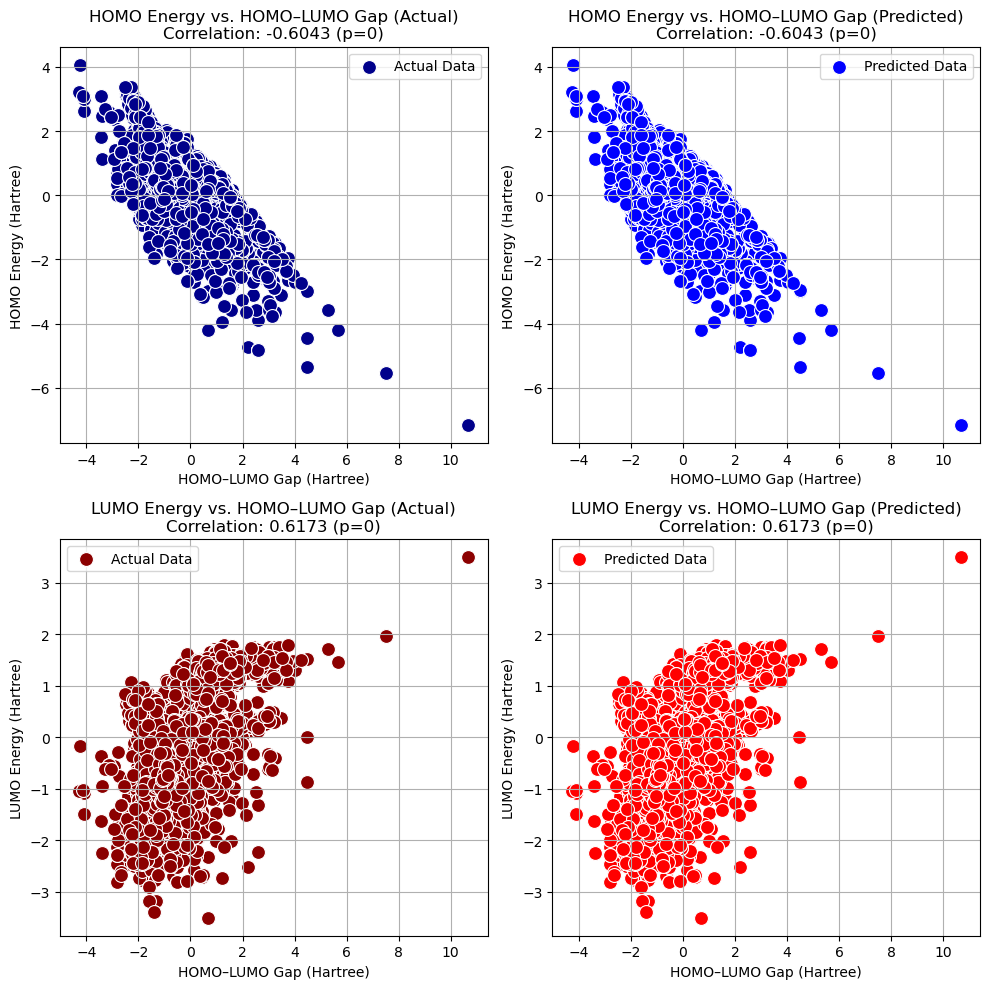

HOMO Energy vs. HOMO–LUMO Gap Correlation (Actual): -0.6043, p-value: 0
LUMO Energy vs. HOMO–LUMO Gap Correlation (Actual): 0.6173, p-value: 0
HOMO Energy vs. HOMO–LUMO Gap Correlation (Predicted): -0.6043, p-value: 0
LUMO Energy vs. HOMO–LUMO Gap Correlation (Predicted): 0.6173, p-value: 0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

qm9_df = pd.read_csv(save_path + "StackingRegressor_Actual_Predicted_h_l_test_51_QM9.csv")

# Calculate HOMO–LUMO gap
qm9_df['HOMO_LUMO_Gap'] = qm9_df['Actual_gap']
qm9_df['HOMO_LUMO_Gap_p'] = qm9_df['Predicted_gap']

# Calculate correlation coefficients
homo_corr_a, homo_p = pearsonr(qm9_df['Actual_hts'], qm9_df['HOMO_LUMO_Gap'])
lumo_corr_a, lumo_p = pearsonr(qm9_df['Actual_lts'], qm9_df['HOMO_LUMO_Gap'])
homo_corr_p, homo_p = pearsonr(qm9_df['Predicted_hts'], qm9_df['HOMO_LUMO_Gap_p'])
lumo_corr_p, lumo_p = pearsonr(qm9_df['Predicted_lts'], qm9_df['HOMO_LUMO_Gap_p'])

# Plot HOMO Energy vs. HOMO–LUMO Gap
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(y='Actual_hts', x='HOMO_LUMO_Gap', data=qm9_df, color='darkblue', s=100, label='Actual Data')
plt.title(f"HOMO Energy vs. HOMO–LUMO Gap (Actual)\nCorrelation: {homo_corr_a:.4f} (p={homo_p:.4g})")
plt.ylabel('HOMO Energy (Hartree)')
plt.xlabel('HOMO–LUMO Gap (Hartree)')
plt.grid()

# Plot LUMO Energy vs. HOMO–LUMO Gap
plt.subplot(2, 2, 3)
sns.scatterplot(y='Actual_lts', x='HOMO_LUMO_Gap', data=qm9_df, color='darkred', s=100, label='Actual Data')
plt.title(f"LUMO Energy vs. HOMO–LUMO Gap (Actual)\nCorrelation: {lumo_corr_a:.4f} (p={lumo_p:.4g})")
plt.ylabel('LUMO Energy (Hartree)')
plt.xlabel('HOMO–LUMO Gap (Hartree)')
plt.grid()

plt.subplot(2, 2, 2)
sns.scatterplot(y='Predicted_hts', x='Predicted_gap', data=qm9_df, color='blue', s=100, label='Predicted Data')
plt.title(f"HOMO Energy vs. HOMO–LUMO Gap (Predicted)\nCorrelation: {homo_corr_p:.4f} (p={homo_p:.4g})")
plt.ylabel('HOMO Energy (Hartree)')
plt.xlabel('HOMO–LUMO Gap (Hartree)')
plt.grid()

# Plot LUMO Energy vs. HOMO–LUMO Gap
plt.subplot(2, 2, 4)
sns.scatterplot(y='Predicted_lts', x='Predicted_gap', data=qm9_df, color='red', s=100, label='Predicted Data')
plt.title(f"LUMO Energy vs. HOMO–LUMO Gap (Predicted)\nCorrelation: {lumo_corr_p:.4f} (p={lumo_p:.4g})")
plt.ylabel('LUMO Energy (Hartree)')
plt.xlabel('HOMO–LUMO Gap (Hartree)')
plt.grid()

# Save the figure
output_file = save_path + "StackingRegressor_HOMO_LUMO_Gap_Correlations_all_test.png"
plt.tight_layout()
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()

# Print correlation coefficients
print(f"HOMO Energy vs. HOMO–LUMO Gap Correlation (Actual): {homo_corr_a:.4f}, p-value: {homo_p:.4g}")
print(f"LUMO Energy vs. HOMO–LUMO Gap Correlation (Actual): {lumo_corr_a:.4f}, p-value: {lumo_p:.4g}")
print(f"HOMO Energy vs. HOMO–LUMO Gap Correlation (Predicted): {homo_corr_p:.4f}, p-value: {homo_p:.4g}")
print(f"LUMO Energy vs. HOMO–LUMO Gap Correlation (Predicted): {lumo_corr_p:.4f}, p-value: {lumo_p:.4g}")

In [1446]:
qm9_df

Index  Actual_hts  Predicted_hts  Actual_lts  Predicted_lts  \
0       26438    0.203483       0.203466    1.269129       1.269157   
1      116671    1.117747       1.117792   -0.619797      -0.619772   
2       38473   -0.587554      -0.587552   -1.300131      -1.300184   
3       19339    0.398261       0.398282   -0.035511      -0.035506   
4       79733   -0.261599      -0.261550   -2.136541      -2.136569   
...       ...         ...            ...         ...            ...   
12925  112092    0.127957       0.128011   -0.737855      -0.737907   
12926   72736    1.356251       1.356279   -1.322142      -1.322173   
12927  105447    0.851418       0.851419   -0.311646      -0.311660   
12928  127014    0.135907       0.135899    0.736868       0.736910   
12929   83224   -0.118497      -0.118519   -1.146055      -1.146109   

       Actual_gap  Predicted_gap  HOMO_LUMO_Gap  HOMO_LUMO_Gap_p  
0        1.065646       1.065691       1.065646         1.065691  
1       -1.737544      -1.737563      -1.737544        -1.737563  
2       -0.712577      -0.712632      -0.712577        -0.712632  
3       -0.433772      -0.433788      -0.433772        -0.433788  
4       -1.874942      -1.875019      -1.874942        -1.875019  
...           ...            ...            ...              ...  
12925   -0.865812      -0.865917      -0.865812        -0.865917  
12926   -2.678392      -2.678452      -2.678392        -2.678452  
12927   -1.163064      -1.163079      -1.163064        -1.163079  
12928    0.600961       0.601011       0.600961         0.601011  
12929   -1.027558      -1.027590      -1.027558        -1.027590  

[12930 rows x 9 columns]

## Residual Analysis of HOMO, LUMO, and HOMO–LUMO Gap Predictions

In [25]:
import pandas as pd
import numpy as np

# Calculate residuals for HOMO, LUMO, and GAP
qm9_df['HOMO_Residuals'] = qm9_df['Predicted_hts'] - qm9_df['Actual_hts']
qm9_df['LUMO_Residuals'] = qm9_df['Predicted_lts'] - qm9_df['Actual_lts']
qm9_df['GAP_Residuals'] = qm9_df['Predicted_gap'] - qm9_df['Actual_gap']

# Compute residual statistics
def residual_stats(residuals):
    return {
        'Mean': np.mean(residuals),
        'Std Dev': np.std(residuals),
        'Min': np.min(residuals),
        'Max': np.max(residuals),
        'RMSE': np.sqrt(np.mean(residuals**2))
    }

# Get statistics
homo_stats = residual_stats(qm9_df['HOMO_Residuals'])
lumo_stats = residual_stats(qm9_df['LUMO_Residuals'])
gap_stats = residual_stats(qm9_df['GAP_Residuals'])

# Create a DataFrame for the statistics
residual_stats_df = pd.DataFrame({
    'HOMO': homo_stats,
    'LUMO': lumo_stats,
    'GAP': gap_stats
})

# Transpose the DataFrame to make the residual types as rows
residual_stats_df = residual_stats_df.T

residual_stats_df.to_csv(save_path + 'Compute_residual_statistics_test_51_QM9.csv', index=False)

residual_stats_df


Mean   Std Dev       Min       Max      RMSE
HOMO  0.000007  0.000322 -0.003378  0.021084  0.000322
LUMO  0.000004  0.000190 -0.007710  0.002082  0.000190
GAP  -0.000003  0.000374 -0.021061  0.003418  0.000374

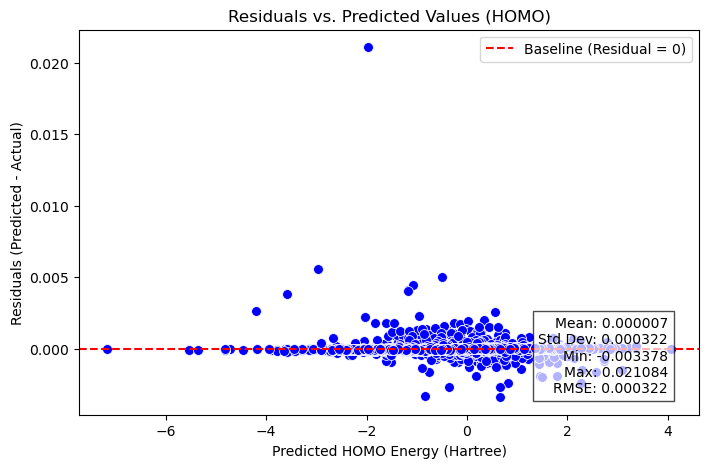

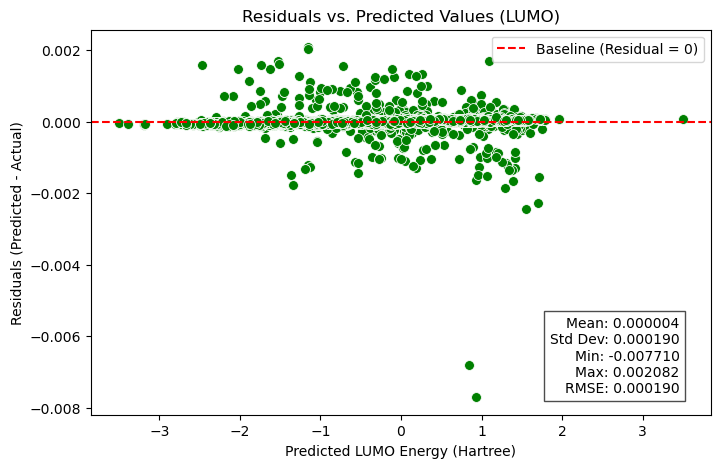

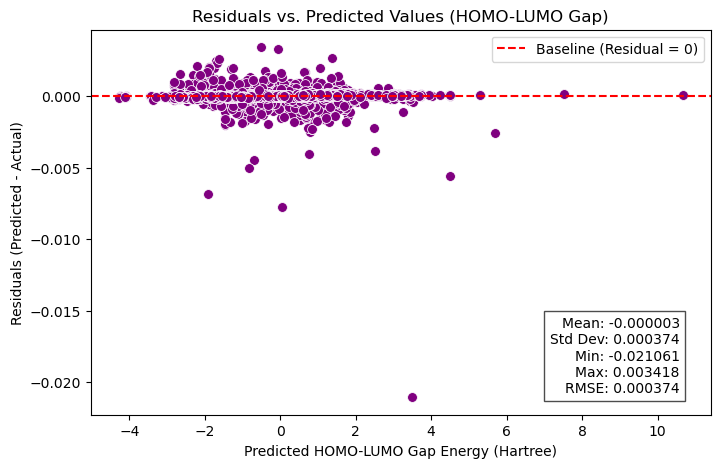

Residuals vs. Predicted Values plots saved:
1. StackingRegressor_Residuals_vs_Predicted_HOMO.png
2. StackingRegressor_Residuals_vs_Predicted_LUMO.png
3. StackingRegressor_Residuals_vs_Predicted_gap.png


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals(x, y, title, xlabel, ylabel, filename, stats, color):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=x, y=y, data=qm9_df, color=color, s=50)
    plt.axhline(0, color='red', linestyle='--', label='Baseline (Residual = 0)')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Annotate with statistics
    stats_text = '\n'.join([f"{key}: {value:.6f}" for key, value in stats.items()])
    plt.text(0.95, 0.05, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='bottom', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.legend()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plotting each residual with a different color
plot_residuals('Predicted_hts', 'HOMO_Residuals', 
               'Residuals vs. Predicted Values (HOMO)', 
               'Predicted HOMO Energy (Hartree)', 'Residuals (Predicted - Actual)', 
               save_path + "StackingRegressor_Residuals_vs_Predicted_HOMO.png", 
               homo_stats, color='blue')

plot_residuals('Predicted_lts', 'LUMO_Residuals', 
               'Residuals vs. Predicted Values (LUMO)', 
               'Predicted LUMO Energy (Hartree)', 'Residuals (Predicted - Actual)', 
               save_path + "StackingRegressor_Residuals_vs_Predicted_LUMO.png", 
               lumo_stats, color='green')

plot_residuals('Predicted_gap', 'GAP_Residuals', 
               'Residuals vs. Predicted Values (HOMO-LUMO Gap)', 
               'Predicted HOMO-LUMO Gap Energy (Hartree)', 'Residuals (Predicted - Actual)', 
               save_path + "StackingRegressor_Residuals_vs_Predicted_gap.png", 
               gap_stats, color='purple')


print("Residuals vs. Predicted Values plots saved:")
print("1. StackingRegressor_Residuals_vs_Predicted_HOMO.png")
print("2. StackingRegressor_Residuals_vs_Predicted_LUMO.png")
print("3. StackingRegressor_Residuals_vs_Predicted_gap.png")

## Splitting the QM9 Dataset While Retaining Original Indices

In [58]:
data1 = pd.read_csv('/media/omid/HDD2/QM9_sci/scaled_common_2D_3D_descriptors_QM9_61.csv')  # Ensure this file has a 'smiles' column
data2 = pd.read_csv('/media/omid/HDD2/QM9_sci/2D_3D_MD_227_QM9.csv')

data = pd.concat([data1, data2.canonical_SMILES], axis=1)
# data.to_csv('/media/omid/HDD2/QM9_sci/smiles_2D_3D_MD_227_QM9.csv', index=False)
data

fr_amidine  NumHAcceptors   fr_urea     Chi3n     Chi1n      zpve  \
0        -0.128318      -1.902598 -0.095057 -2.014281 -5.726432 -2.274836   
1        -0.128318      -0.951946 -0.095057 -2.014281 -5.726432 -2.602505   
2        -0.128318      -1.902598 -0.095057 -2.014281 -5.726432 -3.011910   
3        -0.128318      -1.902598 -0.095057 -2.014281 -5.110055 -2.839546   
4        -0.128318      -0.951946 -0.095057 -2.014281 -5.248989 -3.162453   
...            ...            ...       ...       ...       ...       ...   
129291   -0.128318      -1.902598 -0.095057  3.319806  2.236477 -1.237369   
129292   -0.128318      -0.951946 -0.095057  2.932043  1.877775  0.154508   
129293   -0.128318      -1.902598 -0.095057  3.037698  1.940558 -0.166003   
129294   -0.128318      -1.902598 -0.095057  3.335642  2.206854 -0.164205   
129295   -0.128318      -0.951946 -0.095057  2.592574  1.611479 -0.492915   

             Ipc     Chi1v  SMR_VSA2  fr_nitroso  ...        cv      h298  \
0      -2.038095 -5.708586  -0.38894   -0.006219  ... -4.308392  6.591338   
1      -2.038095 -5.708586  -0.38894   -0.006219  ... -4.344841  6.214275   
2      -2.038095 -5.708586  -0.38894   -0.006219  ... -4.419644  5.747172   
3      -2.012381 -5.093725  -0.38894   -0.006219  ... -3.806926  5.725938   
4      -2.012381 -5.232317   2.22613   -0.006219  ... -4.353894  5.347538   
...          ...       ...       ...         ...  ...       ...       ...   
129291  1.581822  2.234733  -0.38894   -0.006219  ... -0.046288 -0.433634   
129292  1.581822  1.876914  -0.38894   -0.006219  ...  0.965696  0.293712   
129293  1.581822  1.939542  -0.38894   -0.006219  ...  0.435405 -0.084865   
129294  1.581822  2.205183  -0.38894   -0.006219  ...  0.600496 -0.083760   
129295  1.581822  1.611273  -0.38894   -0.006219  ...  0.132143 -0.462194   

        BCUT2D_LOGPLOW  fr_hdrzone  NumHDonors       Chi1  fr_Ndealkylation1  \
0             6.378338   -0.027821   -1.077607 -14.594493          -0.194269   
1             4.772031   -0.027821    0.081132 -14.594493          -0.194269   
2             5.263926   -0.027821   -1.077607 -14.594493          -0.194269   
3             4.527626   -0.027821   -1.077607 -11.105996          -0.194269   
4             4.544728   -0.027821   -1.077607 -11.105996          -0.194269   
...                ...         ...         ...        ...                ...   
129291       -2.633337   -0.027821    0.081132   0.874505          -0.194269   
129292       -0.902997   -0.027821   -1.077607   0.874505          -0.194269   
129293       -2.755690   -0.027821    1.239872   0.874505          -0.194269   
129294       -2.727373   -0.027821    0.081132   0.874505          -0.194269   
129295       -2.793504   -0.027821    0.081132   0.874505          -0.194269   

            homo      lumo                                   canonical_SMILES  
0      -5.540480  1.967471                                                  C  
1      -0.345075  1.283135                                                  N  
2      -1.768147  0.998996                                                  O  
3      -1.438217  0.636819                                                C#C  
4      -4.455289  0.006510                                                C#N  
...          ...       ...                                                ...  
129291 -3.095818 -0.709841  C1[C@H]2[C@@H]3[C@H]2[N@H+]2[C@@H]4C[C@]12[C@H]34  
129292 -0.146322 -0.929949  C1[C@H]2[C@@H]3[C@H]4[C@H]5O[C@@]13[C@@H]2[C@H]54  
129293 -0.985060 -1.222093  C1[N@H+]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@...  
129294 -0.130422 -0.001494  C1[C@H]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@H]34  
129295 -0.905559 -0.401690  C1[N@@H+]2[C@H]3[C@@H]4[C@@H]5O[C@]13[C@H]2[C@...  

[129296 rows x 54 columns]

In [57]:
data.columns

Index(['fr_amidine', 'NumHAcceptors', 'fr_urea', 'Chi3n', 'Chi1n', 'zpve',
       'Ipc', 'Chi1v', 'SMR_VSA2', 'fr_nitroso', 'fr_phenol', 'BCUT2D_MRLOW',
       'VSA_EState4', 'PEOE_VSA2', 'fr_unbrch_alkane', 'SASA (Å²)',
       'PEOE_VSA5', 'SlogP_VSA1', 'BertzCT', 'fr_amide', 'mu', 'BalabanJ',
       'Steric Hindrance', 'fr_priamide', 'fr_ester', 'fr_C_O_noCOO', 'fr_azo',
       'fr_NH1', 'Chi3v', 'fr_para_hydroxylation', 'EState_VSA2', 'qed',
       'fr_COO2', 'alpha', 'r2', 'fr_epoxide', 'g298', 'u0', 'PEOE_VSA11',
       'fr_morpholine', 'Kappa1', 'u298', 'EState_VSA7', 'MaxPartialCharge',
       'cv', 'h298', 'BCUT2D_LOGPLOW', 'fr_hdrzone', 'NumHDonors', 'Chi1',
       'fr_Ndealkylation1', 'homo', 'lumo', 'canonical_SMILES'],
      dtype='object')

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the QM9 dataset
data = pd.read_csv('/media/omid/HDD2/QM9_sci/smiles_2D_3D_MD_227_QM9.csv')

# Add an index column to keep track of the original indices
data['index'] = data.index

# Split the dataset into training (80%), validation (10%), and test (10%) sets
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Assign a 'set' column to indicate the dataset split
train_data['set'] = 'train'
val_data['set'] = 'val'
test_data['set'] = 'test'

# Combine the splits into a single DataFrame
split_data = pd.concat([train_data, val_data, test_data])

# Select only the 'smiles', 'set', and 'index' columns
split_data = split_data[['canonical_SMILES', 'set', 'index']]

# Save the split dataset to a new CSV file
# split_data.to_csv('/media/omid/HDD2/QM9_sci/split_smiles_2D_3D_MD_227_QM9.csv', index=False)

In [62]:
split_data

canonical_SMILES    set   index
118709                     O=CCOCCCCO  train  118709
117588                   CCC(C=O)CCOC  train  117588
88632   O=C[C@]12C[C@@H](O)C[N@H+]1C2  train   88632
35874             C#CCC[C@@H](C#C)C#N  train   35874
63510        C[C@@]1([C@H]2CO2)NCC1=O  train   63510
...                               ...    ...     ...
112092                   COC1OCCNC1=O   test  112092
72736              C#C[C@@H]1OCCC=C1C   test   72736
105447   CC[C@H]1[C@@H](O)[C@]1(O)C#N   test  105447
127014                 O=C(CO)n1ccnn1   test  127014
83224   C[C@@H]1N[C@H](C)[C@@]1(O)C#N   test   83224

[129296 rows x 3 columns]

## Molecular Categorization Based on Structural and Physicochemical Properties

In [328]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

# Function to calculate molecular properties
def categorize_molecule(smiles, quantiles_heavy, quantiles_weight):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # Calculate properties
    num_heavy_atoms = mol.GetNumHeavyAtoms()
    molecular_weight = Descriptors.MolWt(mol)
    ring_count = Chem.rdMolDescriptors.CalcNumRings(mol)

    # Compute degree of unsaturation
    num_carbons = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 6)
    num_hydrogens = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 1)
    num_nitrogens = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 7)
    num_fluorines = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 9)  # QM9 only has Fluorine

    degree_of_unsaturation = (2 * num_carbons + 2 + num_nitrogens - num_hydrogens - num_fluorines) / 2
    is_saturated = degree_of_unsaturation == 0

    # Count aromatic rings
    num_aromatic_rings = rdMolDescriptors.CalcNumAromaticRings(mol)
    is_pah = num_aromatic_rings >= 1

    # Categorize heavy atoms using quantiles
    if num_heavy_atoms < quantiles_heavy[0]:
        heavy_atom_category = "Very Small"
    elif quantiles_heavy[0] <= num_heavy_atoms < quantiles_heavy[1]:
        heavy_atom_category = "Small"
    elif quantiles_heavy[1] <= num_heavy_atoms < quantiles_heavy[2]:
        heavy_atom_category = "Medium"
    else:
        heavy_atom_category = "Large"

    # Categorize molecular weight using quantiles
    if molecular_weight < quantiles_weight[0]:
        weight_category = "Very Light"
    elif quantiles_weight[0] <= molecular_weight < quantiles_weight[1]:
        weight_category = "Light"
    elif quantiles_weight[1] <= molecular_weight < quantiles_weight[2]:
        weight_category = "Medium"
    else:
        weight_category = "Heavy"

    # Categorize ring count
    if ring_count == 0:
        ring_category = "No Rings"
    elif ring_count == 1:
        ring_category = "Single Ring"
    else:
        ring_category = "Multiple Rings"

    return {
        "is_saturated": is_saturated,
        "is_pah": is_pah,
        "heavy_atom_category": heavy_atom_category,
        "weight_category": weight_category,
        "ring_category": ring_category,
    }

# Load data
# data = pd.read_csv("your_data.csv")  # Change this to your actual dataset
data = pd.read_csv('/media/omid/HDD2/QM9_sci/smiles_2D_3D_MD_227_QM9.csv')

# Compute quantiles for heavy atoms and molecular weight
heavy_atoms_list = [Chem.MolFromSmiles(smiles).GetNumHeavyAtoms() for smiles in data["canonical_SMILES"] if Chem.MolFromSmiles(smiles)]
molecular_weights_list = [Descriptors.MolWt(Chem.MolFromSmiles(smiles)) for smiles in data["canonical_SMILES"] if Chem.MolFromSmiles(smiles)]

quantiles_heavy = np.percentile(heavy_atoms_list, [25, 50, 75])
quantiles_weight = np.percentile(molecular_weights_list, [25, 50, 75])

# Apply categorization to the dataset
categories = data["canonical_SMILES"].apply(lambda x: categorize_molecule(x, quantiles_heavy, quantiles_weight))
categories = pd.DataFrame(categories.tolist())

# Combine with the original dataset
data_categorized = pd.concat([data, categories], axis=1)

# Save or analyze the categorized dataset
# data_categorized.to_csv('/media/omid/HDD2/QM9_sci/qm9_categorized_2.csv', index=False)

In [329]:
data_categorized

fr_amidine  NumHAcceptors   fr_urea     Chi3n     Chi1n      zpve  \
0        -0.128318      -1.902598 -0.095057 -2.014281 -5.726432 -2.274836   
1        -0.128318      -0.951946 -0.095057 -2.014281 -5.726432 -2.602505   
2        -0.128318      -1.902598 -0.095057 -2.014281 -5.726432 -3.011910   
3        -0.128318      -1.902598 -0.095057 -2.014281 -5.110055 -2.839546   
4        -0.128318      -0.951946 -0.095057 -2.014281 -5.248989 -3.162453   
...            ...            ...       ...       ...       ...       ...   
129291   -0.128318      -1.902598 -0.095057  3.319806  2.236477 -1.237369   
129292   -0.128318      -0.951946 -0.095057  2.932043  1.877775  0.154508   
129293   -0.128318      -1.902598 -0.095057  3.037698  1.940558 -0.166003   
129294   -0.128318      -1.902598 -0.095057  3.335642  2.206854 -0.164205   
129295   -0.128318      -0.951946 -0.095057  2.592574  1.611479 -0.492915   

             Ipc     Chi1v  SMR_VSA2  fr_nitroso  ...       Chi1  \
0      -2.038095 -5.708586  -0.38894   -0.006219  ... -14.594493   
1      -2.038095 -5.708586  -0.38894   -0.006219  ... -14.594493   
2      -2.038095 -5.708586  -0.38894   -0.006219  ... -14.594493   
3      -2.012381 -5.093725  -0.38894   -0.006219  ... -11.105996   
4      -2.012381 -5.232317   2.22613   -0.006219  ... -11.105996   
...          ...       ...       ...         ...  ...        ...   
129291  1.581822  2.234733  -0.38894   -0.006219  ...   0.874505   
129292  1.581822  1.876914  -0.38894   -0.006219  ...   0.874505   
129293  1.581822  1.939542  -0.38894   -0.006219  ...   0.874505   
129294  1.581822  2.205183  -0.38894   -0.006219  ...   0.874505   
129295  1.581822  1.611273  -0.38894   -0.006219  ...   0.874505   

        fr_Ndealkylation1      homo      lumo  \
0               -0.194269 -5.540480  1.967471   
1               -0.194269 -0.345075  1.283135   
2               -0.194269 -1.768147  0.998996   
3               -0.194269 -1.438217  0.636819   
4               -0.194269 -4.455289  0.006510   
...                   ...       ...       ...   
129291          -0.194269 -3.095818 -0.709841   
129292          -0.194269 -0.146322 -0.929949   
129293          -0.194269 -0.985060 -1.222093   
129294          -0.194269 -0.130422 -0.001494   
129295          -0.194269 -0.905559 -0.401690   

                                         canonical_SMILES  is_saturated  \
0                                                       C         False   
1                                                       N         False   
2                                                       O         False   
3                                                     C#C         False   
4                                                     C#N         False   
...                                                   ...           ...   
129291  C1[C@H]2[C@@H]3[C@H]2[N@H+]2[C@@H]4C[C@]12[C@H]34         False   
129292  C1[C@H]2[C@@H]3[C@H]4[C@H]5O[C@@]13[C@@H]2[C@H]54         False   
129293  C1[N@H+]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@...         False   
129294  C1[C@H]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@H]34         False   
129295  C1[N@@H+]2[C@H]3[C@@H]4[C@@H]5O[C@]13[C@H]2[C@...         False   

        is_pah  heavy_atom_category  weight_category   ring_category  
0        False           Very Small       Very Light        No Rings  
1        False           Very Small       Very Light        No Rings  
2        False           Very Small       Very Light        No Rings  
3        False           Very Small       Very Light        No Rings  
4        False           Very Small       Very Light        No Rings  
...        ...                  ...              ...             ...  
129291   False                Large       Very Light  Multiple Rings  
129292   False                Large       Very Light  Multiple Rings  
129293   False                Large            Light  Multiple Rings  
129294   False                Large       Very Light  Multiple Rin

## Functional Group Detection in QM9 Dataset Using SMARTS Patterns

In [752]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MolFromSmiles, MolToSmiles

# Load the QM9 dataset
data = pd.read_csv('/media/omid/HDD2/QM9_sci/smiles_2D_3D_MD_227_QM9.csv')

# Function to detect functional groups
def detect_functional_groups(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # Initialize a dictionary to store functional group information
    functional_groups = {
        'has_alcohol': False,
        'has_amine': False,
        'has_carbonyl': False,
        'has_carboxylic_acid': False,
        'has_ether': False,
        'has_alkene': False,
        'has_alkyne': False,
        'has_halogen': False,
        'has_nitro': False,
        'has_sulfide': False,
        'has_aldehyde': False,  # New
        'has_alkane': False  # New
    }

    # Detect functional groups using SMARTS patterns
    # Alcohol (-OH)
    functional_groups['has_alcohol'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[OX2H]'))

    # Amine (-NH2, -NHR, -NR2)
    functional_groups['has_amine'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[NX3;H2,H1;!$(NC=O)]'))

    # Carbonyl (C=O)
    functional_groups['has_carbonyl'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[CX3]=[OX1]'))

    # Carboxylic Acid (-COOH)
    functional_groups['has_carboxylic_acid'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[CX3](=O)[OX2H1]'))

    # Ether (-O-)
    functional_groups['has_ether'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[OD2]([#6])[#6]'))

    # Alkene (C=C)
    functional_groups['has_alkene'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[CX3]=[CX3]'))

    # Alkyne (C≡C)
    functional_groups['has_alkyne'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[CX2]#[CX2]'))

    # Halogen (-F, -Cl, -Br, -I)
    functional_groups['has_halogen'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[F,Cl,Br,I]'))

    # Nitro (-NO2)
    functional_groups['has_nitro'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[NX3](=O)=O'))

    # Sulfide (-S-)
    functional_groups['has_sulfide'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[SD2]([#6])[#6]'))

    # Aldehyde (-CHO)
    functional_groups['has_aldehyde'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[CX3H1](=O)[#6]'))

    # Alkane (-CnHm, single bonds only, no rings)
    functional_groups['has_alkane'] = mol.HasSubstructMatch(Chem.MolFromSmarts('[CX4H3]')) or \
                                      mol.HasSubstructMatch(Chem.MolFromSmarts('[CX4H2]')) or \
                                      mol.HasSubstructMatch(Chem.MolFromSmarts('[CX4H]'))

    return functional_groups

# Apply functional group detection to the dataset
functional_groups = data['canonical_SMILES'].apply(detect_functional_groups)
functional_groups = pd.DataFrame(functional_groups.tolist())

# Combine with the original dataset
data_with_functional_groups = pd.concat([data, functional_groups], axis=1)

# Save or analyze the dataset
# data_with_functional_groups.to_csv('/media/omid/HDD2/QM9_sci/qm9_with_functional_groups.csv', index=False)

# # Print some examples
# print(data_with_functional_groups[['smiles', 'has_alcohol', 'has_amine', 'has_carbonyl', 'has_carboxylic_acid', 'has_ether', 'has_alkene', 'has_alkyne', 'has_halogen', 'has_nitro', 'has_sulfide']].head())

In [753]:
data_with_functional_groups

fr_amidine  NumHAcceptors   fr_urea     Chi3n     Chi1n      zpve  \
0        -0.128318      -1.902598 -0.095057 -2.014281 -5.726432 -2.274836   
1        -0.128318      -0.951946 -0.095057 -2.014281 -5.726432 -2.602505   
2        -0.128318      -1.902598 -0.095057 -2.014281 -5.726432 -3.011910   
3        -0.128318      -1.902598 -0.095057 -2.014281 -5.110055 -2.839546   
4        -0.128318      -0.951946 -0.095057 -2.014281 -5.248989 -3.162453   
...            ...            ...       ...       ...       ...       ...   
129291   -0.128318      -1.902598 -0.095057  3.319806  2.236477 -1.237369   
129292   -0.128318      -0.951946 -0.095057  2.932043  1.877775  0.154508   
129293   -0.128318      -1.902598 -0.095057  3.037698  1.940558 -0.166003   
129294   -0.128318      -1.902598 -0.095057  3.335642  2.206854 -0.164205   
129295   -0.128318      -0.951946 -0.095057  2.592574  1.611479 -0.492915   

             Ipc     Chi1v  SMR_VSA2  fr_nitroso  ...  has_carbonyl  \
0      -2.038095 -5.708586  -0.38894   -0.006219  ...         False   
1      -2.038095 -5.708586  -0.38894   -0.006219  ...         False   
2      -2.038095 -5.708586  -0.38894   -0.006219  ...         False   
3      -2.012381 -5.093725  -0.38894   -0.006219  ...         False   
4      -2.012381 -5.232317   2.22613   -0.006219  ...         False   
...          ...       ...       ...         ...  ...           ...   
129291  1.581822  2.234733  -0.38894   -0.006219  ...         False   
129292  1.581822  1.876914  -0.38894   -0.006219  ...         False   
129293  1.581822  1.939542  -0.38894   -0.006219  ...         False   
129294  1.581822  2.205183  -0.38894   -0.006219  ...         False   
129295  1.581822  1.611273  -0.38894   -0.006219  ...         False   

        has_carboxylic_acid  has_ether  has_alkene  has_alkyne  has_halogen  \
0                     False      False       False       False        False   
1                     False      False       False       False        False   
2                     False      False       False       False        False   
3                     False      False       False        True        False   
4                     False      False       False       False        False   
...                     ...        ...         ...         ...          ...   
129291                False      False       False       False        False   
129292                False       True       False       False        False   
129293                False      False       False       False        False   
129294                False      False       False       False        False   
129295                False       True       False       False        False   

        has_nitro  has_sulfide  has_aldehyde  has_alkane  
0           False        False         False       False  
1           False        False         False       False  
2           False        False         False       False  
3           False        False         False       False  
4           False        False         False       False  
...           ...          ...           ...         ...  
129291      False        False         False        True  
129292      False        False         False        True  
129293      False        False         False        True  
129294      False        False         False        True  
129295      False        False         False        True  

[129296 rows x 66 columns]

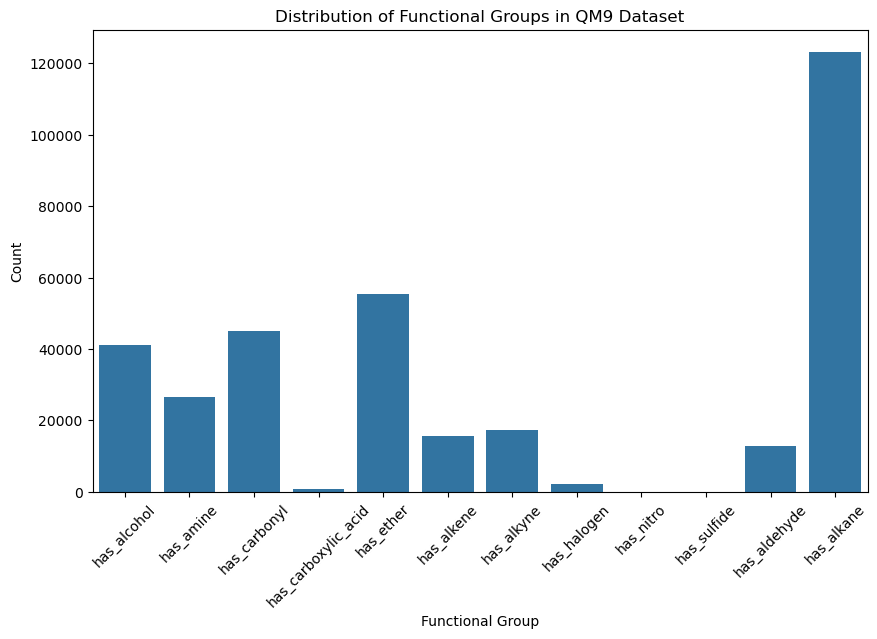

In [754]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of molecules with each functional group
functional_group_counts = functional_groups.sum()

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=functional_group_counts.index, y=functional_group_counts.values)
plt.title('Distribution of Functional Groups in QM9 Dataset')
plt.xlabel('Functional Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [755]:
data

fr_amidine  NumHAcceptors   fr_urea     Chi3n     Chi1n      zpve  \
0        -0.128318      -1.902598 -0.095057 -2.014281 -5.726432 -2.274836   
1        -0.128318      -0.951946 -0.095057 -2.014281 -5.726432 -2.602505   
2        -0.128318      -1.902598 -0.095057 -2.014281 -5.726432 -3.011910   
3        -0.128318      -1.902598 -0.095057 -2.014281 -5.110055 -2.839546   
4        -0.128318      -0.951946 -0.095057 -2.014281 -5.248989 -3.162453   
...            ...            ...       ...       ...       ...       ...   
129291   -0.128318      -1.902598 -0.095057  3.319806  2.236477 -1.237369   
129292   -0.128318      -0.951946 -0.095057  2.932043  1.877775  0.154508   
129293   -0.128318      -1.902598 -0.095057  3.037698  1.940558 -0.166003   
129294   -0.128318      -1.902598 -0.095057  3.335642  2.206854 -0.164205   
129295   -0.128318      -0.951946 -0.095057  2.592574  1.611479 -0.492915   

             Ipc     Chi1v  SMR_VSA2  fr_nitroso  ...        cv      h298  \
0      -2.038095 -5.708586  -0.38894   -0.006219  ... -4.308392  6.591338   
1      -2.038095 -5.708586  -0.38894   -0.006219  ... -4.344841  6.214275   
2      -2.038095 -5.708586  -0.38894   -0.006219  ... -4.419644  5.747172   
3      -2.012381 -5.093725  -0.38894   -0.006219  ... -3.806926  5.725938   
4      -2.012381 -5.232317   2.22613   -0.006219  ... -4.353894  5.347538   
...          ...       ...       ...         ...  ...       ...       ...   
129291  1.581822  2.234733  -0.38894   -0.006219  ... -0.046288 -0.433634   
129292  1.581822  1.876914  -0.38894   -0.006219  ...  0.965696  0.293712   
129293  1.581822  1.939542  -0.38894   -0.006219  ...  0.435405 -0.084865   
129294  1.581822  2.205183  -0.38894   -0.006219  ...  0.600496 -0.083760   
129295  1.581822  1.611273  -0.38894   -0.006219  ...  0.132143 -0.462194   

        BCUT2D_LOGPLOW  fr_hdrzone  NumHDonors       Chi1  fr_Ndealkylation1  \
0             6.378338   -0.027821   -1.077607 -14.594493          -0.194269   
1             4.772031   -0.027821    0.081132 -14.594493          -0.194269   
2             5.263926   -0.027821   -1.077607 -14.594493          -0.194269   
3             4.527626   -0.027821   -1.077607 -11.105996          -0.194269   
4             4.544728   -0.027821   -1.077607 -11.105996          -0.194269   
...                ...         ...         ...        ...                ...   
129291       -2.633337   -0.027821    0.081132   0.874505          -0.194269   
129292       -0.902997   -0.027821   -1.077607   0.874505          -0.194269   
129293       -2.755690   -0.027821    1.239872   0.874505          -0.194269   
129294       -2.727373   -0.027821    0.081132   0.874505          -0.194269   
129295       -2.793504   -0.027821    0.081132   0.874505          -0.194269   

            homo      lumo                                   canonical_SMILES  
0      -5.540480  1.967471                                                  C  
1      -0.345075  1.283135                                                  N  
2      -1.768147  0.998996                                                  O  
3      -1.438217  0.636819                                                C#C  
4      -4.455289  0.006510                                                C#N  
...          ...       ...                                                ...  
129291 -3.095818 -0.709841  C1[C@H]2[C@@H]3[C@H]2[N@H+]2[C@@H]4C[C@]12[C@H]34  
129292 -0.146322 -0.929949  C1[C@H]2[C@@H]3[C@H]4[C@H]5O[C@@]13[C@@H]2[C@H]54  
129293 -0.985060 -1.222093  C1[N@H+]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@...  
129294 -0.130422 -0.001494  C1[C@H]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@H]34  
129295 -0.905559 -0.401690  C1[N@@H+]2[C@H]3[C@@H]4[C@@H]5O[C@]13[C@H]2[C@...  

[129296 rows x 54 columns]

In [49]:
import pandas as pd

# Load the three CSV files
split_smiles = pd.read_csv('/media/omid/HDD2/QM9_sci/split_smiles_2D_3D_MD_227_QM9.csv')
categorized = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_categorized_2.csv')
functional_groups = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_with_functional_groups.csv')

# Check the columns in each DataFrame
print("Split Smiles Columns:", split_smiles.columns)
print("Categorized Columns:", categorized.columns)
print("Functional Groups Columns:", functional_groups.columns)

# Concatenate the DataFrames column-wise
# Ensure the DataFrames are aligned by their indices
combined_data = pd.concat([split_smiles, categorized, functional_groups], axis=1)

# Check the combined DataFrame
print("Combined DataFrame Columns:", combined_data.columns)
combined_data.head()

# Save the combined DataFrame to a new CSV file (optional)
# combined_data.to_csv('/media/omid/HDD2/QM9_sci/qm9_combined_for_distribution.csv', index=False)

Split Smiles Columns: Index(['canonical_SMILES', 'set', 'index'], dtype='object')
Categorized Columns: Index(['fr_amidine', 'NumHAcceptors', 'fr_urea', 'Chi3n', 'Chi1n', 'zpve',
       'Ipc', 'Chi1v', 'SMR_VSA2', 'fr_nitroso', 'fr_phenol', 'BCUT2D_MRLOW',
       'VSA_EState4', 'PEOE_VSA2', 'fr_unbrch_alkane', 'SASA (Å²)',
       'PEOE_VSA5', 'SlogP_VSA1', 'BertzCT', 'fr_amide', 'mu', 'BalabanJ',
       'Steric Hindrance', 'fr_priamide', 'fr_ester', 'fr_C_O_noCOO', 'fr_azo',
       'fr_NH1', 'Chi3v', 'fr_para_hydroxylation', 'EState_VSA2', 'qed',
       'fr_COO2', 'alpha', 'r2', 'fr_epoxide', 'g298', 'u0', 'PEOE_VSA11',
       'fr_morpholine', 'Kappa1', 'u298', 'EState_VSA7', 'MaxPartialCharge',
       'cv', 'h298', 'BCUT2D_LOGPLOW', 'fr_hdrzone', 'NumHDonors', 'Chi1',
       'fr_Ndealkylation1', 'homo', 'lumo', 'canonical_SMILES', 'is_saturated',
       'is_pah', 'heavy_atom_category', 'weight_category', 'ring_category'],
      dtype='object')
Functional Groups Columns: Index(['fr_amid

canonical_SMILES    set   index  fr_amidine  NumHAcceptors  \
0                     O=CCOCCCCO  train  118709   -0.128318      -1.902598   
1                   CCC(C=O)CCOC  train  117588   -0.128318      -0.951946   
2  O=C[C@]12C[C@@H](O)C[N@H+]1C2  train   88632   -0.128318      -1.902598   
3            C#CCC[C@@H](C#C)C#N  train   35874   -0.128318      -1.902598   
4       C[C@@]1([C@H]2CO2)NCC1=O  train   63510   -0.128318      -0.951946   

    fr_urea     Chi3n     Chi1n      zpve       Ipc  ...  has_carbonyl  \
0 -0.095057 -2.014281 -5.726432 -2.274836 -2.038095  ...         False   
1 -0.095057 -2.014281 -5.726432 -2.602505 -2.038095  ...         False   
2 -0.095057 -2.014281 -5.726432 -3.011910 -2.038095  ...         False   
3 -0.095057 -2.014281 -5.110055 -2.839546 -2.012381  ...         False   
4 -0.095057 -2.014281 -5.248989 -3.162453 -2.012381  ...         False   

   has_carboxylic_acid  has_ether  has_alkene  has_alkyne  has_halogen  \
0                False      False       False       False        False   
1                False      False       False       False        False   
2                False      False       False       False        False   
3                False      False       False        True        False   
4                False      False       False       False        False   

   has_nitro  has_sulfide  has_aldehyde  has_alkane  
0      False        False         False       False  
1      False        False         False       False  
2      False        False         False       False  
3      False        False         False       False  
4      False        False         False       False  

[5 rows x 128 columns]

## Kernel Density Estimation (KDE) Analysis of HOMO, LUMO, and HOMO-LUMO Gap

HOMO-LUMO Gap: -4.2745, KDE Value: 0.0025
HOMO-LUMO Gap: 10.6625, KDE Value: 0.0008
HOMO-LUMO Gap: -0.6954, KDE Value: 0.2994
HOMO-LUMO Gap: 3.2333, KDE Value: 0.0218
HOMO-LUMO Gap: 7.1620, KDE Value: 0.0000
HOMO Energy: -4.2745, KDE Value: 0.0018
HOMO Energy: 10.6625, KDE Value: 0.0000
HOMO Energy: -0.6954, KDE Value: 0.2524
HOMO Energy: 3.2333, KDE Value: 0.0056
HOMO Energy: 7.1620, KDE Value: 0.0000
LUMO Energy: -4.2745, KDE Value: 0.0000
LUMO Energy: 10.6625, KDE Value: 0.0000
LUMO Energy: -0.6954, KDE Value: 0.2874
LUMO Energy: 3.2333, KDE Value: 0.0000
LUMO Energy: 7.1620, KDE Value: 0.0000


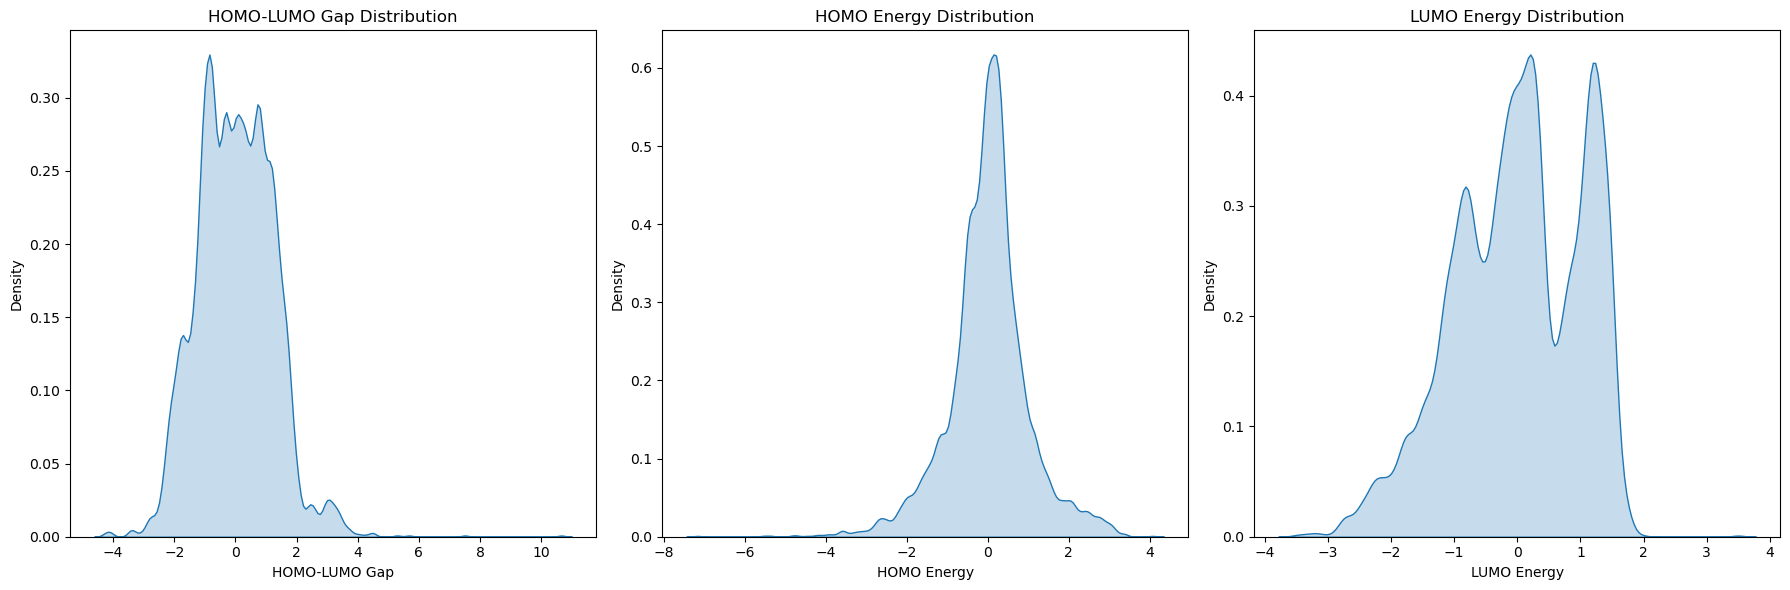

In [761]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the dataset
combined_data = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_combined_for_distribution.csv')

# Compute HOMO-LUMO gap
combined_data['homo_lumo_gap'] = combined_data['lumo'] - combined_data['homo']

# Function to calculate KDE and return values at specific points
def extract_kde_values(data, feature_name, points):
    kde = gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    # Extract the KDE values at the specified points
    point_kde_values = []
    for point in points:
        kde_value = kde(point)
        point_kde_values.append((feature_name, point, kde_value[0]))  # Extract scalar value from ndarray
    
    return point_kde_values

# List of specific points to evaluate (e.g., min, max, and some intermediate values)
points_to_check = [min(combined_data['homo_lumo_gap']), max(combined_data['homo_lumo_gap']), -0.6954, 3.2333, 7.1620]

# Initialize empty list to store results
kde_results = []

# Extract KDE values for HOMO-LUMO Gap
kde_results.extend(extract_kde_values(combined_data['homo_lumo_gap'], 'HOMO-LUMO Gap', points_to_check))

# Extract KDE values for HOMO Energy
kde_results.extend(extract_kde_values(combined_data['homo'], 'HOMO Energy', points_to_check))

# Extract KDE values for LUMO Energy
kde_results.extend(extract_kde_values(combined_data['lumo'], 'LUMO Energy', points_to_check))

# Convert the results into a DataFrame
kde_df = pd.DataFrame(kde_results, columns=['Feature', 'X_Value', 'KDE_Value'])

# Show the extracted values
for _, row in kde_df.iterrows():
    print(f"{row['Feature']}: {row['X_Value']:.4f}, KDE Value: {row['KDE_Value']:.4f}")

# Optionally, save the DataFrame to a CSV file
# kde_df.to_csv('/media/omid/HDD2/QM9_sci/kde_values.csv', index=False)

# Plotting (same as previous)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# KDE Plot for HOMO-LUMO Gap
sns.kdeplot(data=combined_data, x="homo_lumo_gap", fill=True, ax=axes[0])
axes[0].set_title('HOMO-LUMO Gap Distribution')
axes[0].set_xlabel('HOMO-LUMO Gap')

# KDE Plot for HOMO Energy
sns.kdeplot(data=combined_data, x="homo", fill=True, ax=axes[1])
axes[1].set_title('HOMO Energy Distribution')
axes[1].set_xlabel('HOMO Energy')

# KDE Plot for LUMO Energy
sns.kdeplot(data=combined_data, x="lumo", fill=True, ax=axes[2])
axes[2].set_title('LUMO Energy Distribution')
axes[2].set_xlabel('LUMO Energy')

plt.tight_layout()
plt.show()

In [762]:
kde_df

Feature    X_Value      KDE_Value
0   HOMO-LUMO Gap  -4.274484   2.516579e-03
1   HOMO-LUMO Gap  10.662500   8.470255e-04
2   HOMO-LUMO Gap  -0.695400   2.993977e-01
3   HOMO-LUMO Gap   3.233300   2.179605e-02
4   HOMO-LUMO Gap   7.162000   1.068191e-05
5     HOMO Energy  -4.274484   1.782533e-03
6     HOMO Energy  10.662500   0.000000e+00
7     HOMO Energy  -0.695400   2.524322e-01
8     HOMO Energy   3.233300   5.605630e-03
9     HOMO Energy   7.162000  3.420750e-234
10    LUMO Energy  -4.274484   4.369720e-18
11    LUMO Energy  10.662500   0.000000e+00
12    LUMO Energy  -0.695400   2.873517e-01
13    LUMO Energy   3.233300   2.255551e-05
14    LUMO Energy   7.162000   0.000000e+00

## KDE Analysis of HOMO, LUMO, and HOMO-LUMO Gap Based on Alcohol Presence

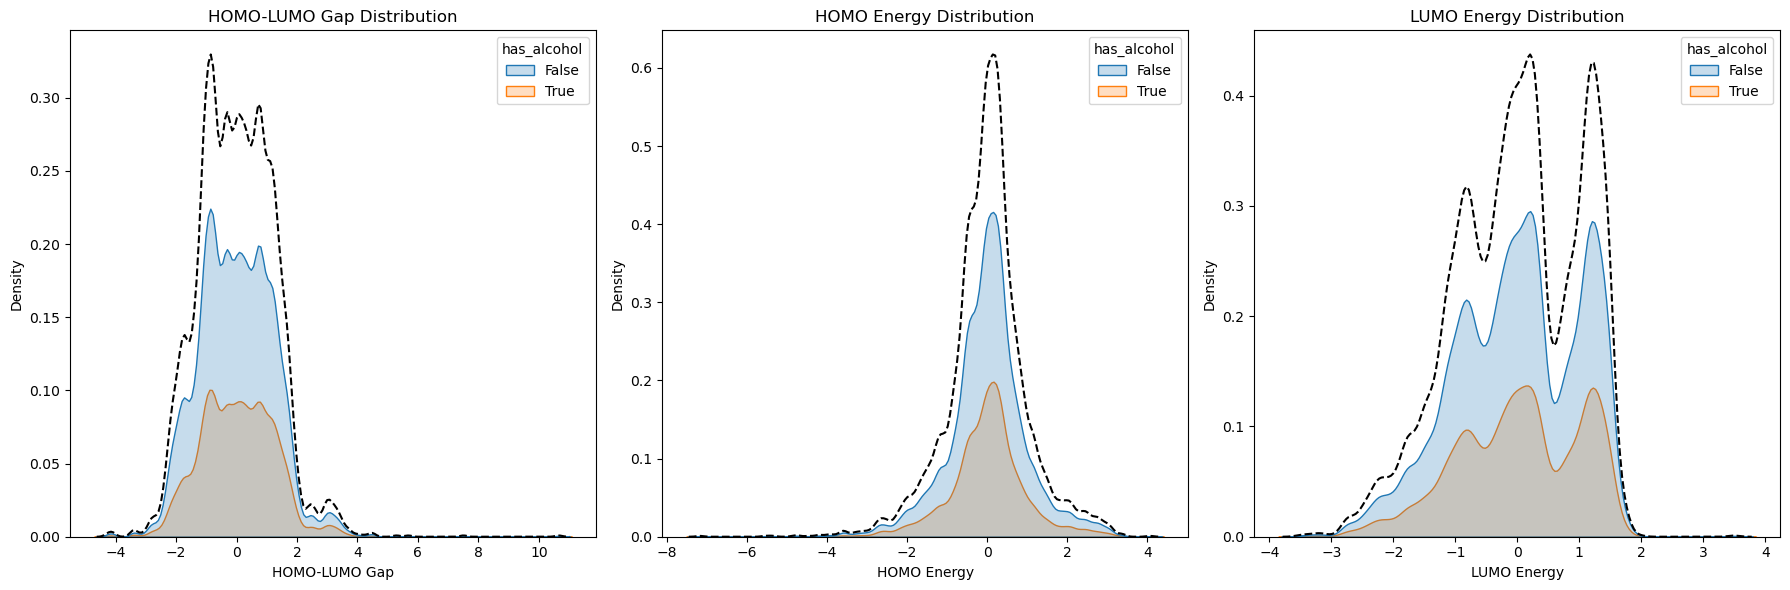

In [765]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
combined_data = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_combined_for_distribution.csv')

# Add a column for the HOMO-LUMO gap (if not already present)
combined_data['homo_lumo_gap'] = combined_data['lumo'] - combined_data['homo']

# Count molecules for each ring category
ring_categories = combined_data['has_alcohol'].unique()
category_counts = {category: (combined_data['has_alcohol'] == category).sum() for category in ring_categories}

# Create a figure with 3 subplots (HOMO-LUMO Gap, HOMO, LUMO)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot HOMO-LUMO Gap
sns.kdeplot(data=combined_data, x="homo_lumo_gap", hue="has_alcohol", fill=True, ax=axes[0])
sns.kdeplot(combined_data['homo_lumo_gap'], color='black', linestyle='--', ax=axes[0])
axes[0].set_title('HOMO-LUMO Gap Distribution')
axes[0].set_xlabel('HOMO-LUMO Gap')
axes[0].set_ylabel('Density')

# Plot HOMO
sns.kdeplot(data=combined_data, x="homo", hue="has_alcohol", fill=True, ax=axes[1])
sns.kdeplot(combined_data['homo'], color='black', linestyle='--', ax=axes[1])
axes[1].set_title('HOMO Energy Distribution')
axes[1].set_xlabel('HOMO Energy')
axes[1].set_ylabel('Density')

# Plot LUMO
sns.kdeplot(data=combined_data, x="lumo", hue="has_alcohol", fill=True, ax=axes[2])
sns.kdeplot(combined_data['lumo'], color='black', linestyle='--', ax=axes[2])
axes[2].set_title('LUMO Energy Distribution')
axes[2].set_xlabel('LUMO Energy')
axes[2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('/media/omid/HDD2/QM9_sci/has_alcohol_gap_homo_lumo_distribution.png', dpi=300)
plt.show()

## HOMO-LUMO Gap Distribution Across Train, Validation, and Test Sets by Ring Category

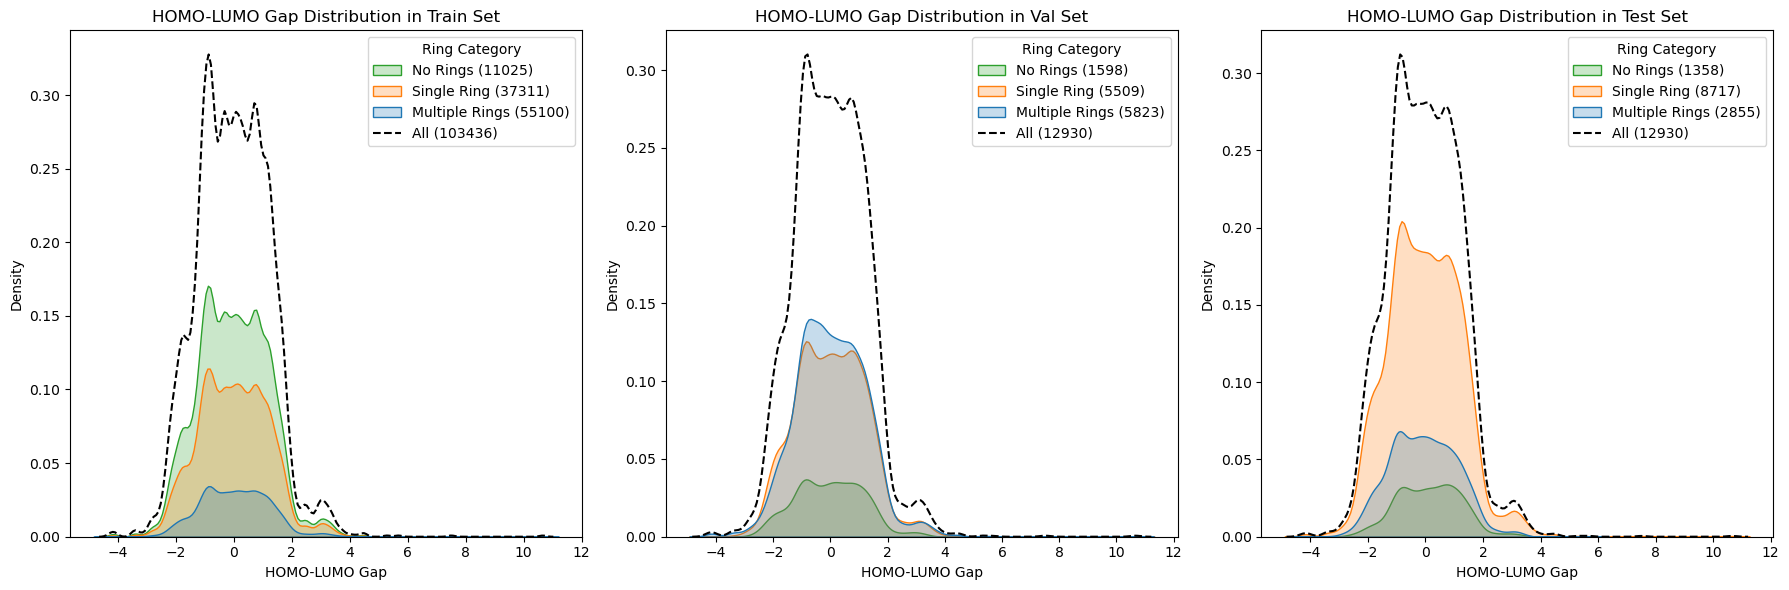

In [766]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
combined_data = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_combined_for_distribution.csv')

# Add a column for the HOMO-LUMO gap (if not already present)
combined_data['homo_lumo_gap'] = combined_data['lumo'] - combined_data['homo']

# Set up the figure and axes for a row of subplots (3 columns for train, val, test)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot the distribution of HOMO-LUMO gap for alkene-containing and non-alkene molecules for each dataset and all data
for i, dataset in enumerate(['train', 'val', 'test']):
    subset = combined_data[combined_data['set'] == dataset]
    
    # Count molecules for True and False categories
    n_count = (subset['ring_category'] == 'No Rings').sum()
    s_count = (subset['ring_category'] == 'Single Ring').sum()
    m_count = (subset['ring_category'] == 'Multiple Rings').sum()
    total_count = len(subset)
    
    # Create the displot for both categories and their combination
    sns.kdeplot(data=subset, x="homo_lumo_gap", hue="ring_category", fill=True, ax=axes[i], legend=False)
    sns.kdeplot(subset['homo_lumo_gap'], color='black', linestyle='--', label=f'All ({total_count})', ax=axes[i])
    
    # Manually add the legend for Alkene Presence
    axes[i].legend(
        labels=[f'No Rings ({n_count})', f'Single Ring ({s_count})', f'Multiple Rings ({m_count})', f'All ({total_count})'],
        title="Ring Category"
    )
    
    # Set title and labels for each subplot
    axes[i].set_title(f'HOMO-LUMO Gap Distribution in {dataset.capitalize()} Set')
    axes[i].set_xlabel('HOMO-LUMO Gap')
    axes[i].set_ylabel('Density')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## HOMO-LUMO Gap Distribution Across Train, Validation, and Test Sets by Alkene Presence

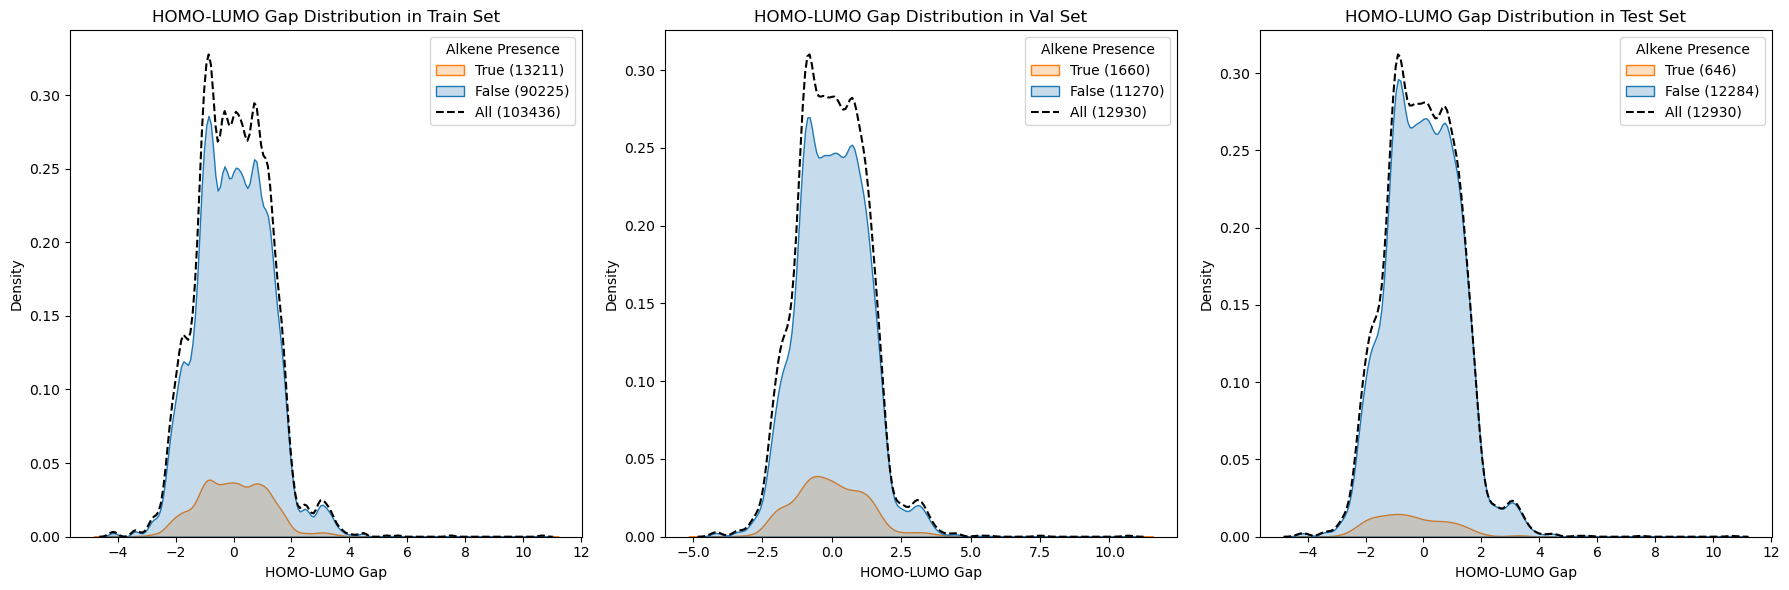

In [768]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
combined_data = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_combined_for_distribution.csv')

# Add a column for the HOMO-LUMO gap (if not already present)
combined_data['homo_lumo_gap'] = combined_data['lumo'] - combined_data['homo']

# Set up the figure and axes for a row of subplots (3 columns for train, val, test)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot the distribution of HOMO-LUMO gap for alkene-containing and non-alkene molecules for each dataset
for i, dataset in enumerate(['train', 'val', 'test']):
    subset = combined_data[combined_data['set'] == dataset]
    
    # Count molecules for True and False categories
    true_count = (subset['has_alkene'] == True).sum()
    false_count = (subset['has_alkene'] == False).sum()
    total_count = len(subset)
    
    # Create the displot for both categories and their combination
    sns.kdeplot(data=subset, x="homo_lumo_gap", hue="has_alkene", fill=True, ax=axes[i], legend=False)
    sns.kdeplot(subset['homo_lumo_gap'], color='black', linestyle='--', label=f'All ({total_count})', ax=axes[i])
    
    # Manually add the legend for Alkene Presence
    axes[i].legend(
        labels=[f'True ({true_count})', f'False ({false_count})', f'All ({total_count})'],
        title="Alkene Presence"
    )
    
    # Set title and labels for each subplot
    axes[i].set_title(f'HOMO-LUMO Gap Distribution in {dataset.capitalize()} Set')
    axes[i].set_xlabel('HOMO-LUMO Gap')
    axes[i].set_ylabel('Density')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## HOMO-LUMO Gap Distribution Across Molecular Categories and Functional Groups

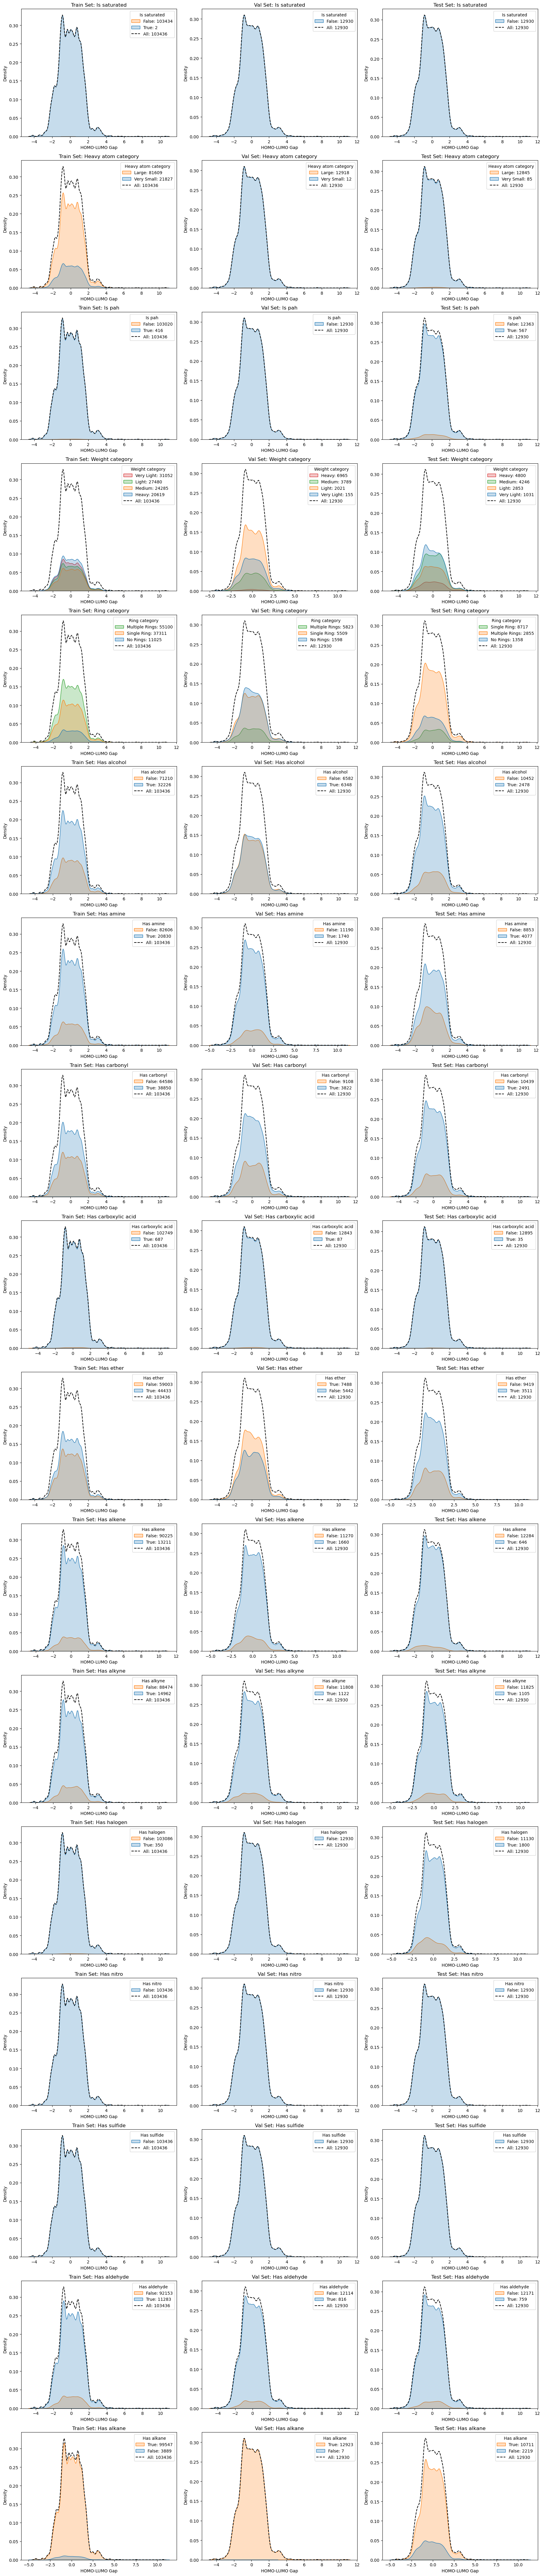

In [769]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
combined_data = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_combined_for_distribution.csv')

# Add a column for the HOMO-LUMO gap (if not already present)
combined_data['homo_lumo_gap'] = combined_data['lumo'] - combined_data['homo']

# List of properties you want to plot
properties = ['is_saturated', 'heavy_atom_category', 'is_pah', 'weight_category', 'ring_category', 
              'has_alcohol', 'has_amine', 'has_carbonyl', 'has_carboxylic_acid', 'has_ether', 
              'has_alkene', 'has_alkyne', 'has_halogen', 'has_nitro', 'has_sulfide', 'has_aldehyde', 'has_alkane']

# Set up the figure and axes for a grid of subplots (15 rows, 3 columns)
fig, axes = plt.subplots(len(properties), 3, figsize=(18, 5 * len(properties)))  # 15 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over each property and create the corresponding plot for train, val, and test
for i, property_name in enumerate(properties):
    for j, dataset in enumerate(['train', 'val', 'test']):
        # Create the subset of data where the property is True/False or a category and based on the dataset
        subset = combined_data[combined_data['set'] == dataset]
        
        # Count molecules for different categories
        if property_name in ['heavy_atom_category', 'weight_category', 'ring_category']:
            category_counts = subset[property_name].value_counts()
            total_count = len(subset)
            # Ensure "All" category is included
            category_counts['All'] = total_count
        else:
            # For True/False categories like 'has_alkene'
            category_counts = subset[property_name].value_counts()
            total_count = len(subset)
            # Ensure "All" category is included
            category_counts['All'] = total_count
        
        # Plot the KDE for the selected property and dataset
        sns.kdeplot(data=subset, x="homo_lumo_gap", hue=property_name, fill=True, ax=axes[i * 3 + j], legend=False)
        sns.kdeplot(subset['homo_lumo_gap'], color='black', linestyle='--', label=f'All ({total_count})', ax=axes[i * 3 + j])
        
        # Update legend with counts for categories, including the "All" category
        labels = [f'{category}: {count}' for category, count in category_counts.items()]
        axes[i * 3 + j].legend(
            labels=labels,
            title=property_name.replace('_', ' ').capitalize()
        )
        
        # Set title and labels dynamically based on the property and dataset
        axes[i * 3 + j].set_title(f'{dataset.capitalize()} Set: {property_name.replace("_", " ").capitalize()}')
        axes[i * 3 + j].set_xlabel('HOMO-LUMO Gap')
        axes[i * 3 + j].set_ylabel('Density')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Save the plot to a file
plt.savefig('/media/omid/HDD2/QM9_sci/qm9_combined_for_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

##  PAH Classification and Ring Structure Analysis based on molecular_props and functional_groups

In [32]:
molecular_props = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_categorized_2.csv')
functional_groups = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_with_functional_groups.csv')

data = pd.concat([
    molecular_props[['canonical_SMILES', 'homo', 'lumo', 'is_saturated', 'is_pah', 'heavy_atom_category',
                     'weight_category', 'ring_category']],
    functional_groups[['has_alcohol', 'has_amine', 'has_carbonyl', 'has_carboxylic_acid',
                      'has_ether', 'has_alkene', 'has_alkyne', 'has_halogen', 'has_nitro',
                       'has_sulfide', 'has_aldehyde', 'has_alkane']]
], axis=1)

# Calculate the HOMO-LUMO gap
data['homo_lumo_gap'] = data['lumo'] - data['homo']

# Insert homo_lumo_gap in column index 4 (after lumo)
column_order = ['canonical_SMILES', 'homo', 'lumo', 'homo_lumo_gap', 'is_saturated', 
                'is_pah', 'heavy_atom_category', 'weight_category', 'ring_category', 
                'has_alcohol', 'has_amine', 'has_carbonyl', 'has_carboxylic_acid', 
                'has_ether', 'has_alkene', 'has_alkyne', 'has_halogen', 'has_nitro',
                'has_sulfide', 'has_aldehyde', 'has_alkane']

# Reorder DataFrame
data = data[column_order]

In [33]:
data.shape, data.columns#, data.head()

((129296, 21),
 Index(['canonical_SMILES', 'homo', 'lumo', 'homo_lumo_gap', 'is_saturated',
        'is_pah', 'heavy_atom_category', 'weight_category', 'ring_category',
        'has_alcohol', 'has_amine', 'has_carbonyl', 'has_carboxylic_acid',
        'has_ether', 'has_alkene', 'has_alkyne', 'has_halogen', 'has_nitro',
        'has_sulfide', 'has_aldehyde', 'has_alkane'],
       dtype='object'))

In [34]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

# Define SMARTS patterns for PAH detection
benzene_smarts = Chem.MolFromSmarts("c1ccccc1")  # Single benzene ring
naphthalene_smarts = Chem.MolFromSmarts("c1ccc2ccccc2c1")  # Two fused benzene rings
anthracene_smarts = Chem.MolFromSmarts("c1ccc2c(c1)ccc3ccccc23")  # Three fused benzene rings
four_ring_pah_smarts = Chem.MolFromSmarts("c1ccc2c(c1)ccc3c4cccc4ccc23")  # 4 fused benzene rings

def classify_pah(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES"

    mol = Chem.RemoveHs(mol)  # Remove explicit hydrogens

    # Count total and aromatic rings
    num_rings = rdMolDescriptors.CalcNumRings(mol)
    num_aromatic_rings = rdMolDescriptors.CalcNumAromaticRings(mol)

    # Check for PAH structures
    has_benzene = mol.HasSubstructMatch(benzene_smarts)
    has_naphthalene = mol.HasSubstructMatch(naphthalene_smarts)
    has_anthracene = mol.HasSubstructMatch(anthracene_smarts)
    has_four_ring_pah = mol.HasSubstructMatch(four_ring_pah_smarts)

    # PAH Classification
    if has_four_ring_pah or num_aromatic_rings >= 4:
        return f"PAH-4+ (Large PAH, {num_aromatic_rings} aromatic rings)"
    elif has_anthracene:
        return f"PAH-3 (Anthracene-like, {num_aromatic_rings} aromatic rings)"
    elif has_naphthalene:
        return f"PAH-2 (Naphthalene-like, {num_aromatic_rings} aromatic rings)"
    elif has_benzene:
        return f"PAH-1 (Single Benzene, {num_aromatic_rings} aromatic rings)"
    elif num_rings > 0:
        return f"Non-PAH ({num_aromatic_rings} aromatic rings, {num_rings} total rings)"
    else:
        return "Non-PAH (No Rings)"

# Ensure DataFrame includes HOMO & LUMO columns
df = pd.DataFrame(data[["canonical_SMILES", "homo", "lumo", "homo_lumo_gap"]])

# Apply PAH classification function
df["PAH_Class"] = df["canonical_SMILES"].apply(classify_pah)

# Calculate total and aromatic rings for reference
df["Total_Rings"] = df["canonical_SMILES"].apply(lambda smi: rdMolDescriptors.CalcNumRings(Chem.MolFromSmiles(smi)) if Chem.MolFromSmiles(smi) else None)
df["Aromatic_Rings"] = df["canonical_SMILES"].apply(lambda smi: rdMolDescriptors.CalcNumAromaticRings(Chem.MolFromSmiles(smi)) if Chem.MolFromSmiles(smi) else None)
# df.to_csv('/media/omid/HDD2/QM9_sci/qm9_PAH_Class.csv', index=False)
df

canonical_SMILES      homo      lumo  \
0                                                       C -5.540480  1.967471   
1                                                       N -0.345075  1.283135   
2                                                       O -1.768147  0.998996   
3                                                     C#C -1.438217  0.636819   
4                                                     C#N -4.455289  0.006510   
...                                                   ...       ...       ...   
129291  C1[C@H]2[C@@H]3[C@H]2[N@H+]2[C@@H]4C[C@]12[C@H]34 -3.095818 -0.709841   
129292  C1[C@H]2[C@@H]3[C@H]4[C@H]5O[C@@]13[C@@H]2[C@H]54 -0.146322 -0.929949   
129293  C1[N@H+]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@... -0.985060 -1.222093   
129294  C1[C@H]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@H]34 -0.130422 -0.001494   
129295  C1[N@@H+]2[C@H]3[C@@H]4[C@@H]5O[C@]13[C@H]2[C@... -0.905559 -0.401690   

        homo_lumo_gap                                  PAH_Class  Total_Rings  \
0            7.507951                         Non-PAH (No Rings)            0   
1            1.628211                         Non-PAH (No Rings)            0   
2            2.767143                         Non-PAH (No Rings)            0   
3            2.075036                         Non-PAH (No Rings)            0   
4            4.461798                         Non-PAH (No Rings)            0   
...               ...                                        ...          ...   
129291       2.385976  Non-PAH (0 aromatic rings, 8 total rings)            8   
129292      -0.783627  Non-PAH (0 aromatic rings, 8 total rings)            8   
129293      -0.237032  Non-PAH (0 aromatic rings, 8 total rings)            8   
129294       0.128928  Non-PAH (0 aromatic rings, 8 total rings)            8   
129295       0.503869  Non-PAH (0 aromatic rings, 8 total rings)            8   

        Aromatic_Rings  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
129291               0  
129292               0  
129293               0  
129294               0  
129295               0  

[129296 rows x 7 columns]

In [35]:
class_counts = df['PAH_Class'].value_counts()
print(class_counts)

PAH_Class
Non-PAH (0 aromatic rings, 1 total rings)    33998
Non-PAH (0 aromatic rings, 2 total rings)    30908
Non-PAH (0 aromatic rings, 3 total rings)    18694
Non-PAH (1 aromatic rings, 1 total rings)    17242
Non-PAH (No Rings)                           13981
Non-PAH (0 aromatic rings, 4 total rings)     5391
Non-PAH (1 aromatic rings, 2 total rings)     3628
Non-PAH (0 aromatic rings, 5 total rings)     3075
Non-PAH (2 aromatic rings, 2 total rings)      967
Non-PAH (0 aromatic rings, 6 total rings)      576
PAH-1 (Single Benzene, 1 aromatic rings)       312
Non-PAH (1 aromatic rings, 3 total rings)      212
Non-PAH (0 aromatic rings, 7 total rings)      202
Non-PAH (1 aromatic rings, 4 total rings)       68
Non-PAH (0 aromatic rings, 8 total rings)       26
PAH-1 (Single Benzene, 2 aromatic rings)        16
Name: count, dtype: int64


In [36]:
# Define the unique PAH classes based on your description
unique_classes = [
    "PAH-1 (Single Benzene, 1 aromatic rings)",
    "PAH-1 (Single Benzene, 2 aromatic rings)",
    "Non-PAH (No Rings)",
    "Non-PAH (0 aromatic rings, 1 total rings)",
    "Non-PAH (0 aromatic rings, 2 total rings)",
    "Non-PAH (0 aromatic rings, 3 total rings)",
    "Non-PAH (0 aromatic rings, 4 total rings)",
    "Non-PAH (0 aromatic rings, 5 total rings)",
    "Non-PAH (0 aromatic rings, 6 total rings)",
    "Non-PAH (0 aromatic rings, 7 total rings)",
    "Non-PAH (0 aromatic rings, 8 total rings)",
    "Non-PAH (1 aromatic rings, 1 total rings)",
    "Non-PAH (1 aromatic rings, 2 total rings)",
    "Non-PAH (1 aromatic rings, 3 total rings)",
    "Non-PAH (1 aromatic rings, 4 total rings)",
    "Non-PAH (2 aromatic rings, 2 total rings)"
]

# Create binary columns for each class
df_transformed = df.copy()
for cls in unique_classes:
    df_transformed[cls] = df_transformed["PAH_Class"].apply(lambda x: 1 if x == cls else 0)

# Drop the original PAH_Class column
df_transformed.drop(columns=["PAH_Class"], inplace=True)
# df_transformed.to_csv('/media/omid/HDD2/QM9_sci/qm9_P+-AH_Class_rings.csv', index=False)
df_transformed

canonical_SMILES      homo      lumo  \
0                                                       C -5.540480  1.967471   
1                                                       N -0.345075  1.283135   
2                                                       O -1.768147  0.998996   
3                                                     C#C -1.438217  0.636819   
4                                                     C#N -4.455289  0.006510   
...                                                   ...       ...       ...   
129291  C1[C@H]2[C@@H]3[C@H]2[N@H+]2[C@@H]4C[C@]12[C@H]34 -3.095818 -0.709841   
129292  C1[C@H]2[C@@H]3[C@H]4[C@H]5O[C@@]13[C@@H]2[C@H]54 -0.146322 -0.929949   
129293  C1[N@H+]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@... -0.985060 -1.222093   
129294  C1[C@H]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@H]34 -0.130422 -0.001494   
129295  C1[N@@H+]2[C@H]3[C@@H]4[C@@H]5O[C@]13[C@H]2[C@... -0.905559 -0.401690   

        homo_lumo_gap  Total_Rings  Aromatic_Rings  \
0            7.507951            0               0   
1            1.628211            0               0   
2            2.767143            0               0   
3            2.075036            0               0   
4            4.461798            0               0   
...               ...          ...             ...   
129291       2.385976            8               0   
129292      -0.783627            8               0   
129293      -0.237032            8               0   
129294       0.128928            8               0   
129295       0.503869            8               0   

        PAH-1 (Single Benzene, 1 aromatic rings)  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
129291                                         0   
129292                                         0   
129293                                         0   
129294                                         0   
129295                                         0   

        PAH-1 (Single Benzene, 2 aromatic rings)  Non-PAH (No Rings)  \
0                                              0                   1   
1                                              0                   1   
2                                              0                   1   
3                                              0                   1   
4                                              0                   1   
...                                          ...                 ...   
129291                                         0                   0   
129292                                         0                   0   
129293                                         0                   0   
129294                                         0                   0   
129295                                         0                   0   

        Non-PAH (0 aromatic rings, 1 total rings)  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
129291                                          0  ...   
129292                                          0  ...   
129293                                          0  ...   
129294                                          0  ...   
129295                                          0  ...   

        Non-PAH (0 aromatic rings, 4 total rings)  \
0                                               0   
1                                               0   
2                                               0   
3                   

In [48]:
print(df_transformed.iloc[:, 6:].sum())  # Count 1s in each PAH class column

PAH-1 (Single Benzene, 1 aromatic rings)       312
PAH-1 (Single Benzene, 2 aromatic rings)        16
Non-PAH (No Rings)                           13981
Non-PAH (0 aromatic rings, 1 total rings)    33998
Non-PAH (0 aromatic rings, 2 total rings)    30908
Non-PAH (0 aromatic rings, 3 total rings)    18694
Non-PAH (0 aromatic rings, 4 total rings)     5391
Non-PAH (0 aromatic rings, 5 total rings)     3075
Non-PAH (0 aromatic rings, 6 total rings)      576
Non-PAH (0 aromatic rings, 7 total rings)      202
Non-PAH (0 aromatic rings, 8 total rings)       26
Non-PAH (1 aromatic rings, 1 total rings)    17242
Non-PAH (1 aromatic rings, 2 total rings)     3628
Non-PAH (1 aromatic rings, 3 total rings)      212
Non-PAH (1 aromatic rings, 4 total rings)       68
Non-PAH (2 aromatic rings, 2 total rings)      967
dtype: int64


In [40]:
bool_columns = data.select_dtypes(include=bool).columns.tolist()
print(bool_columns)

['is_saturated', 'is_pah', 'has_alcohol', 'has_amine', 'has_carbonyl', 'has_carboxylic_acid', 'has_ether', 'has_alkene', 'has_alkyne', 'has_halogen', 'has_nitro', 'has_sulfide', 'has_aldehyde', 'has_alkane']


In [41]:
# Make a boolian dataframe of functional group
columns_to_convert = bool_columns
df_bool_functional_group = data[columns_to_convert].astype(int).copy()
df_bool_functional_group.head()

is_saturated  is_pah  has_alcohol  has_amine  has_carbonyl  \
0             0       0            0          0             0   
1             0       0            0          0             0   
2             0       0            0          0             0   
3             0       0            0          0             0   
4             0       0            0          0             0   

   has_carboxylic_acid  has_ether  has_alkene  has_alkyne  has_halogen  \
0                    0          0           0           0            0   
1                    0          0           0           0            0   
2                    0          0           0           0            0   
3                    0          0           0           1            0   
4                    0          0           0           0            0   

   has_nitro  has_sulfide  has_aldehyde  has_alkane  
0          0            0             0           0  
1          0            0             0           0  
2          0            0             0           0  
3          0            0             0           0  
4          0            0             0           0

In [42]:
# Concatenate the boolian functional group and PAH rings data
df_bool_functional_group_trans = pd.concat([df_transformed, df_bool_functional_group], axis=1)

# Function to count carbon atoms in a SMILES string
def count_carbon(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == "C")
    return None  # Return None for invalid SMILES

# Apply function to each SMILES in the dataframe and create a new column
df_bool_functional_group_trans["carbon_count"] = df_bool_functional_group_trans["canonical_SMILES"].apply(count_carbon)

# df_bool_functional_group_trans.to_csv('/media/omid/HDD2/QM9_sci/qm9_bool_f_g_PAH_Class_rings.csv', index=False)
df_bool_functional_group_trans

canonical_SMILES      homo      lumo  \
0                                                       C -5.540480  1.967471   
1                                                       N -0.345075  1.283135   
2                                                       O -1.768147  0.998996   
3                                                     C#C -1.438217  0.636819   
4                                                     C#N -4.455289  0.006510   
...                                                   ...       ...       ...   
129291  C1[C@H]2[C@@H]3[C@H]2[N@H+]2[C@@H]4C[C@]12[C@H]34 -3.095818 -0.709841   
129292  C1[C@H]2[C@@H]3[C@H]4[C@H]5O[C@@]13[C@@H]2[C@H]54 -0.146322 -0.929949   
129293  C1[N@H+]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@... -0.985060 -1.222093   
129294  C1[C@H]2[C@@H]3[C@H]2[C@H]2[N@@H+]4C[C@]12[C@H]34 -0.130422 -0.001494   
129295  C1[N@@H+]2[C@H]3[C@@H]4[C@@H]5O[C@]13[C@H]2[C@... -0.905559 -0.401690   

        homo_lumo_gap  Total_Rings  Aromatic_Rings  \
0            7.507951            0               0   
1            1.628211            0               0   
2            2.767143            0               0   
3            2.075036            0               0   
4            4.461798            0               0   
...               ...          ...             ...   
129291       2.385976            8               0   
129292      -0.783627            8               0   
129293      -0.237032            8               0   
129294       0.128928            8               0   
129295       0.503869            8               0   

        PAH-1 (Single Benzene, 1 aromatic rings)  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
129291                                         0   
129292                                         0   
129293                                         0   
129294                                         0   
129295                                         0   

        PAH-1 (Single Benzene, 2 aromatic rings)  Non-PAH (No Rings)  \
0                                              0                   1   
1                                              0                   1   
2                                              0                   1   
3                                              0                   1   
4                                              0                   1   
...                                          ...                 ...   
129291                                         0                   0   
129292                                         0                   0   
129293                                         0                   0   
129294                                         0                   0   
129295                                         0                   0   

        Non-PAH (0 aromatic rings, 1 total rings)  ...  has_carboxylic_acid  \
0                                               0  ...                    0   
1                                               0  ...                    0   
2                                               0  ...                    0   
3                                               0  ...                    0   
4                                               0  ...                    0   
...                                           ...  ...                  ...   
129291                                          0  ...                    0   
129292                                          0  ...                    0   
129293                                          0  ...                    0   
129294                                          0  ...                    0   
129295                                          0  ...      

In [43]:
df_bool_functional_group_trans.columns

Index(['canonical_SMILES', 'homo', 'lumo', 'homo_lumo_gap', 'Total_Rings',
       'Aromatic_Rings', 'PAH-1 (Single Benzene, 1 aromatic rings)',
       'PAH-1 (Single Benzene, 2 aromatic rings)', 'Non-PAH (No Rings)',
       'Non-PAH (0 aromatic rings, 1 total rings)',
       'Non-PAH (0 aromatic rings, 2 total rings)',
       'Non-PAH (0 aromatic rings, 3 total rings)',
       'Non-PAH (0 aromatic rings, 4 total rings)',
       'Non-PAH (0 aromatic rings, 5 total rings)',
       'Non-PAH (0 aromatic rings, 6 total rings)',
       'Non-PAH (0 aromatic rings, 7 total rings)',
       'Non-PAH (0 aromatic rings, 8 total rings)',
       'Non-PAH (1 aromatic rings, 1 total rings)',
       'Non-PAH (1 aromatic rings, 2 total rings)',
       'Non-PAH (1 aromatic rings, 3 total rings)',
       'Non-PAH (1 aromatic rings, 4 total rings)',
       'Non-PAH (2 aromatic rings, 2 total rings)', 'is_saturated', 'is_pah',
       'has_alcohol', 'has_amine', 'has_carbonyl', 'has_carboxylic_acid',
       

In [44]:
print(df_transformed.iloc[:, 6:].sum()) 

PAH-1 (Single Benzene, 1 aromatic rings)       312
PAH-1 (Single Benzene, 2 aromatic rings)        16
Non-PAH (No Rings)                           13981
Non-PAH (0 aromatic rings, 1 total rings)    33998
Non-PAH (0 aromatic rings, 2 total rings)    30908
Non-PAH (0 aromatic rings, 3 total rings)    18694
Non-PAH (0 aromatic rings, 4 total rings)     5391
Non-PAH (0 aromatic rings, 5 total rings)     3075
Non-PAH (0 aromatic rings, 6 total rings)      576
Non-PAH (0 aromatic rings, 7 total rings)      202
Non-PAH (0 aromatic rings, 8 total rings)       26
Non-PAH (1 aromatic rings, 1 total rings)    17242
Non-PAH (1 aromatic rings, 2 total rings)     3628
Non-PAH (1 aromatic rings, 3 total rings)      212
Non-PAH (1 aromatic rings, 4 total rings)       68
Non-PAH (2 aromatic rings, 2 total rings)      967
dtype: int64


In [24]:
df_bool_functional_group_trans = pd.read_csv('/media/omid/HDD2/QM9_sci/qm9_bool_f_g_PAH_Class_rings.csv')
df_bool_functional_group_trans.head()

canonical_SMILES      homo      lumo  homo_lumo_gap  Total_Rings  \
0                C -5.540480  1.967471       7.507951            0   
1                N -0.345075  1.283135       1.628211            0   
2                O -1.768147  0.998996       2.767143            0   
3              C#C -1.438217  0.636819       2.075036            0   
4              C#N -4.455289  0.006510       4.461798            0   

   Aromatic_Rings  PAH-1 (Single Benzene, 1 aromatic rings)  \
0               0                                         0   
1               0                                         0   
2               0                                         0   
3               0                                         0   
4               0                                         0   

   PAH-1 (Single Benzene, 2 aromatic rings)  Non-PAH (No Rings)  \
0                                         0                   1   
1                                         0                   1   
2                                         0                   1   
3                                         0                   1   
4                                         0                   1   

   Non-PAH (0 aromatic rings, 1 total rings)  ...  has_carboxylic_acid  \
0                                          0  ...                    0   
1                                          0  ...                    0   
2                                          0  ...                    0   
3                                          0  ...                    0   
4                                          0  ...                    0   

   has_ether  has_alkene  has_alkyne  has_halogen  has_nitro  has_sulfide  \
0          0           0           0            0          0            0   
1          0           0           0            0          0            0   
2          0           0           0            0          0            0   
3          0           0           1            0          0            0   
4          0           0           0            0          0            0   

   has_aldehyde  has_alkane  carbon_count  
0             0           0             1  
1             0           0             0  
2             0           0             0  
3             0           0             2  
4             0           0             1  

[5 rows x 37 columns]

## Filtering and Renaming Functional Groups in Molecular Data

In [25]:
# Functional groups list
functional_groups = ['has_alcohol', 'has_amine', 'has_carbonyl', 'has_carboxylic_acid', 
                     'has_ether', 'has_alkene', 'has_alkyne', 'has_halogen', 'has_nitro',
                     'has_sulfide', 'has_aldehyde', 'has_alkane']

# The new names that you want to assign
new_names = ['-OH', '-NH2, -NHR, -NR2', 'C=O', '-COOH', '-O-', 'C=C',
             'C≡C', '-F, -Cl, -Br, -I', '-NO2', '-S-', '-CHO', '-CnHm']

# Create a dictionary to map functional group to new names
name_mapping = dict(zip(functional_groups, new_names))

# Initialize the filtered_rows dictionary
filtered_rows = {}

# Loop through functional groups and apply filtering
for group in functional_groups:
    filtered_rows[group] = df_bool_functional_group_trans[
        (df_bool_functional_group_trans['Non-PAH (No Rings)'] == 1) &
        (df_bool_functional_group_trans[group] == 1)
    ]

# Rename the elements in filtered_rows to the new names
for group, new_name in name_mapping.items():
    filtered_rows[new_name] = filtered_rows.pop(group)

# Now you can access the filtered data using the new names
filtered_rows1 = filtered_rows['-OH']
filtered_rows2 = filtered_rows['-NH2, -NHR, -NR2']
filtered_rows3 = filtered_rows['C=O']
filtered_rows4 = filtered_rows['-COOH']
filtered_rows5 = filtered_rows['-O-']
filtered_rows6 = filtered_rows['C=C']
filtered_rows7 = filtered_rows['C≡C']
filtered_rows8 = filtered_rows['-F, -Cl, -Br, -I']
filtered_rows9 = filtered_rows['-NO2']
filtered_rows10 = filtered_rows['-S-']
filtered_rows11 = filtered_rows['-CHO']
filtered_rows12 = filtered_rows['-CnHm']

## Summary of HOMO-LUMO Gap Statistics for Functional Groups

In [26]:
# Initialize the summary data dictionary
summary_data = {}

# Loop through each filtered DataFrame
for i, (key, df) in enumerate(filtered_rows.items()):
    if not df.empty:
        summary_data[key] = {
            "Max HOMO-LUMO Gap": round(df["homo_lumo_gap"].max(), 3),
            "Min HOMO-LUMO Gap": round(df["homo_lumo_gap"].min(), 3),
            "diff. Max-Min Gap": round(df["homo_lumo_gap"].max() - df["homo_lumo_gap"].min(), 3),
            "No. of Molecules": int(df["homo_lumo_gap"].shape[0]),
        }
    else:
        summary_data[key] = {
            "Max HOMO-LUMO Gap": None,
            "Min HOMO-LUMO Gap": None,
            "diff. Max-Min Gap": None,
            "No. of Molecules": None,
        }

# Convert to a DataFrame
summary_df = pd.DataFrame.from_dict(summary_data, orient="index")

# Reset index for better readability
summary_df.reset_index(inplace=True)
summary_df.rename(columns={"index": "Functional Group"}, inplace=True)

# Ensure float columns are formatted to 3 decimal places
float_cols = ["Max HOMO-LUMO Gap", "Min HOMO-LUMO Gap", "diff. Max-Min Gap"]
summary_df[float_cols] = summary_df[float_cols].applymap(lambda x: round(x, 3) if pd.notnull(x) else x)

# Ensure "No. of Molecules" is an integer
summary_df["No. of Molecules"] = summary_df["No. of Molecules"].astype("Int64")  # Keeps NaN as <NA>

# Add a row for the total sum of No. of Molecules
total_molecules = summary_df["No. of Molecules"].sum(skipna=True)
summary_df.loc[len(summary_df)] = ["Total", None, None, None, total_molecules]

# summary_df.to_csv("/media/omid/HDD2/QM9_sci/homo_lumo_gap_summary_functional_groups_Non-PAH_No_Rings.csv", index=False)

summary_df

Functional Group  Max HOMO-LUMO Gap  Min HOMO-LUMO Gap  diff. Max-Min Gap  \
0                -OH              7.508             -4.274             11.782   
1   -NH2, -NHR, -NR2              5.292             -4.274              9.567   
2                C=O              7.508             -4.274             11.782   
3              -COOH              5.292             -3.045              8.337   
4                -O-              5.292             -4.101              9.393   
5                C=C              2.824             -2.138              4.962   
6                C≡C             10.663             -3.455             14.118   
7   -F, -Cl, -Br, -I              3.212             -3.415              6.627   
8               -NO2                NaN                NaN                NaN   
9                -S-                NaN                NaN                NaN   
10              -CHO              5.682             -4.239              9.921   
11             -CnHm             10.663             -4.274             14.937   
12             Total                NaN                NaN                NaN   

    No. of Molecules  
0               5770  
1               2120  
2               8676  
3                368  
4               4840  
5                 14  
6               4834  
7                257  
8               <NA>  
9               <NA>  
10              2791  
11             13582  
12             43252

## Visualization of HOMO-LUMO Gaps with Annotated Molecular Structures for Functional Groups

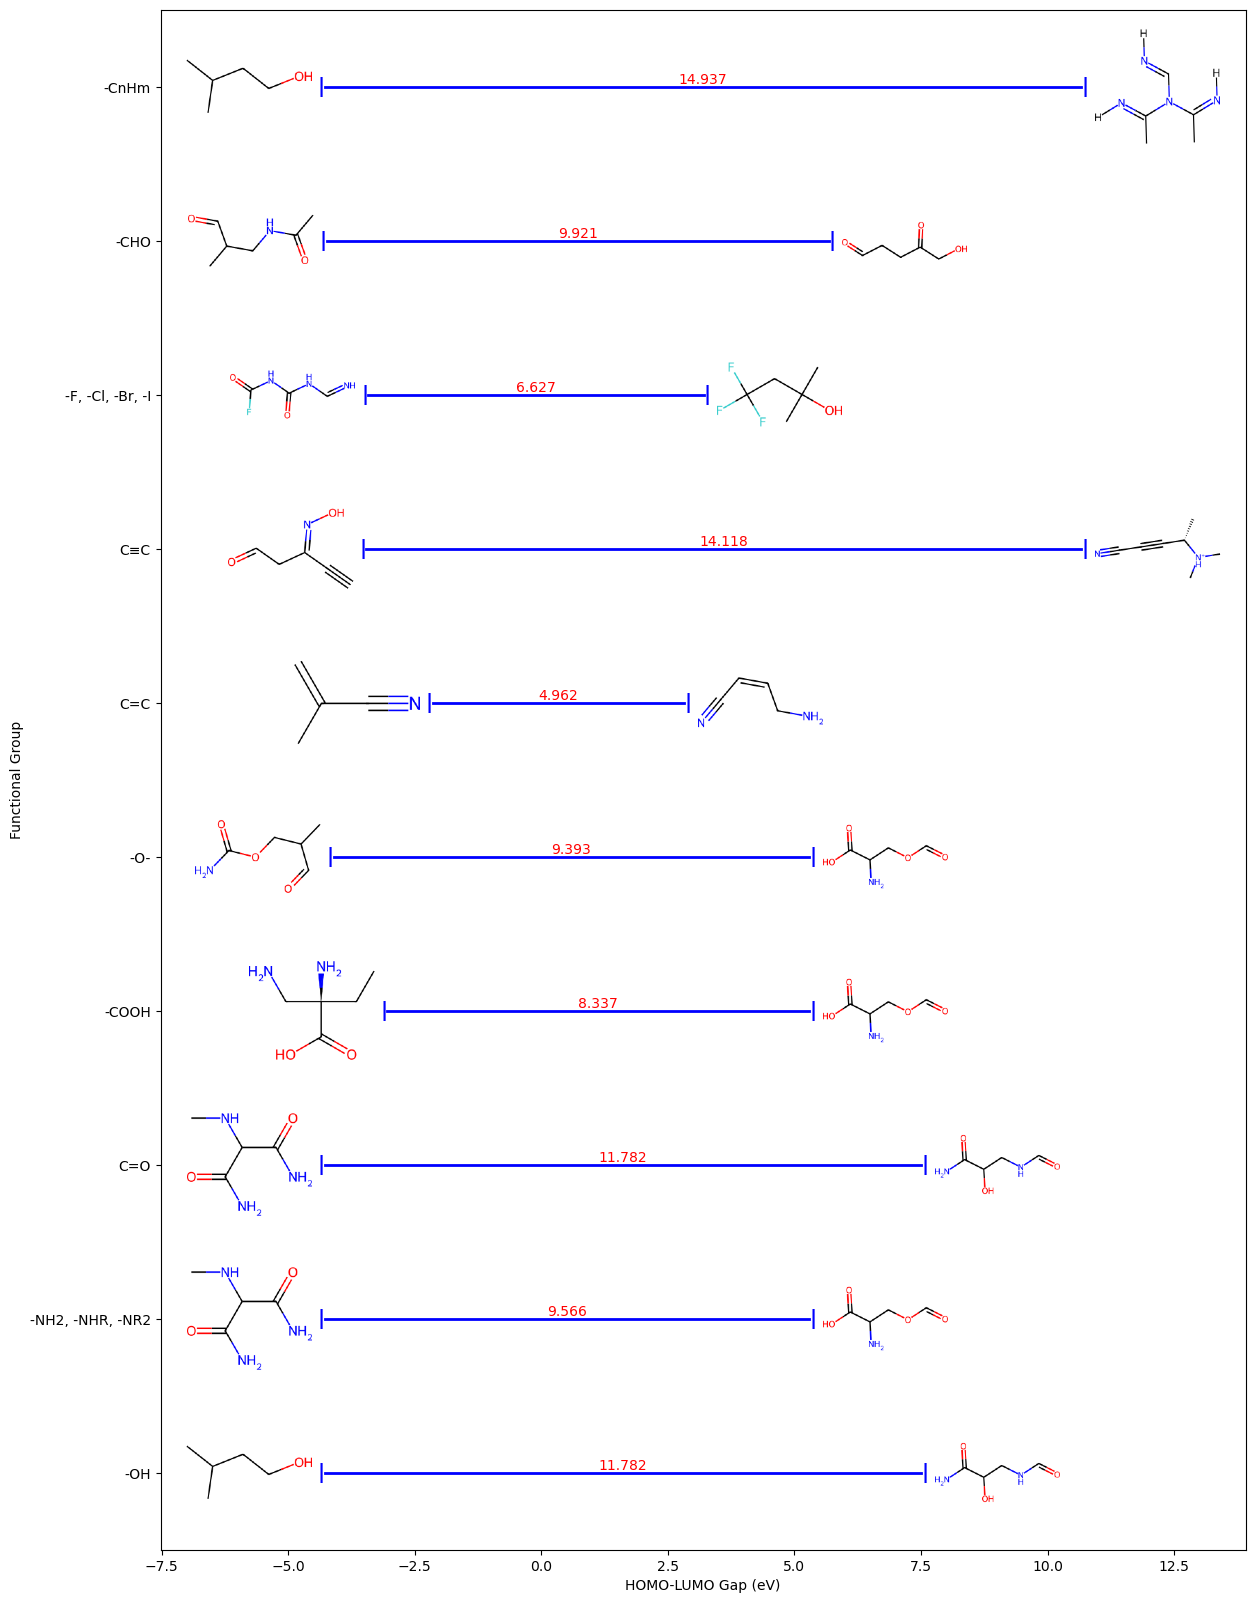

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to generate and save molecule images
def save_molecule_image(smiles, filename):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol, size=(200, 200))  # Larger molecule image
        img.save(filename)

# Function to load images as OffsetImage
def get_molecule_image(path, zoom=0.5):
    if os.path.exists(path):
        img = mpimg.imread(path)
        return OffsetImage(img, zoom=zoom)
    return None

# Ensure 'summary_df' is defined
if 'summary_df' not in locals():
    raise ValueError("summary_df is not defined. Please provide the required DataFrame.")

# Filter out rows with NaN in the 'Min HOMO-LUMO Gap' or 'Max HOMO-LUMO Gap'
valid_rows = summary_df.dropna(subset=["Min HOMO-LUMO Gap", "Max HOMO-LUMO Gap"])

# Dynamically adjust figure height based on number of functional groups
# fig_height = max(6, len(valid_rows) * 0.6)  # Ensure minimum height
# fig, ax = plt.subplots(figsize=(12, fig_height))
fig_height = (len(valid_rows) * 2.0)  # Adjust spacing dynamically
fig, ax = plt.subplots(figsize=(14, fig_height))  # Increase width


# Calculate y_positions with flexible spacing
y_positions = np.linspace(0, len(valid_rows) - 1, len(valid_rows))

# Ensure 'filtered_rows' is defined
if 'filtered_rows' not in locals():
    raise ValueError("filtered_rows is not defined. Please provide the required dictionary of DataFrames.")

# Loop through each valid functional group
for y_pos, (idx, row) in zip(y_positions, valid_rows.iterrows()):
    if row["Functional Group"] == "Total":
        continue  # Skip the total row
    
    min_gap, max_gap = row["Min HOMO-LUMO Gap"], row["Max HOMO-LUMO Gap"]
    avg_gap = (max_gap - min_gap)  # Calculate the average gap
    
    # Get filtered DataFrame for this functional group
    functional_group = row["Functional Group"]
    df_filtered = filtered_rows.get(functional_group, pd.DataFrame())
    
    if not df_filtered.empty:
        # Draw line with "|--" and "--|" markers
        # ax.plot([min_gap, max_gap], [y_pos, y_pos], 'b-', linewidth=2)  # Connecting line
        ax.text(min_gap, y_pos, "|", fontsize=14, ha="right", va="center", color="blue", fontweight="bold")
        ax.text(max_gap, y_pos, "|", fontsize=14, ha="left", va="center", color="blue", fontweight="bold")
        
        # Draw line between min and max gaps
        ax.plot([min_gap, max_gap], [y_pos, y_pos], 'b-', linewidth=2)
        # ax.text(avg_gap, y_pos, f"{avg_gap:.3f}", ha="center", va="bottom", fontsize=10, color="red")
        ax.text((min_gap + max_gap) / 2, y_pos, f"{avg_gap:.3f}", ha="center", va="bottom", fontsize=10, color="red")

        
        # Get molecule with min and max gap
        min_smiles_df = df_filtered[np.isclose(df_filtered["homo_lumo_gap"], min_gap, atol=1e-3)]
        max_smiles_df = df_filtered[np.isclose(df_filtered["homo_lumo_gap"], max_gap, atol=1e-3)]
        
        if not min_smiles_df.empty:
            min_smiles = min_smiles_df.iloc[0]["canonical_SMILES"]
            min_img_path = f"mol_{functional_group}_min.png"
            save_molecule_image(min_smiles, min_img_path)
            min_img = get_molecule_image(min_img_path)
            if min_img:
                ax.add_artist(AnnotationBbox(min_img, (min_gap - 1.5, y_pos), frameon=False))
        
        if not max_smiles_df.empty:
            max_smiles = max_smiles_df.iloc[0]["canonical_SMILES"]
            max_img_path = f"mol_{functional_group}_max.png"
            save_molecule_image(max_smiles, max_img_path)
            max_img = get_molecule_image(max_img_path)
            if max_img:
                ax.add_artist(AnnotationBbox(max_img, (max_gap + 1.5, y_pos), frameon=False))

# Labels and formatting
ax.set_xlabel("HOMO-LUMO Gap (eV)")
ax.set_ylabel("Functional Group")
ax.set_yticks(y_positions)
ax.set_yticklabels(valid_rows["Functional Group"])
# ax.set_title("Visualization of HOMO-LUMO Gaps with Annotated Molecular Structures")

# Adjust plot limits for better padding
ax.set_xlim(ax.get_xlim()[0] - 2.5, ax.get_xlim()[1] + 2.5)
ax.set_ylim(y_positions[0] - .5, y_positions[-1] + .5)

# Save the figure
# plt.savefig("/media/omid/HDD2/QM9_sci/homo_lumo_gap_for_functional_groups_Non-PAH_No_Rings.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


##  Mean HOMO-LUMO Gap vs. Carbon Count for Various Functional Groups

Error interpolating data for Carboxylic Acid (-COOH): The number of derivatives at boundaries does not match: expected 3, got 0+0


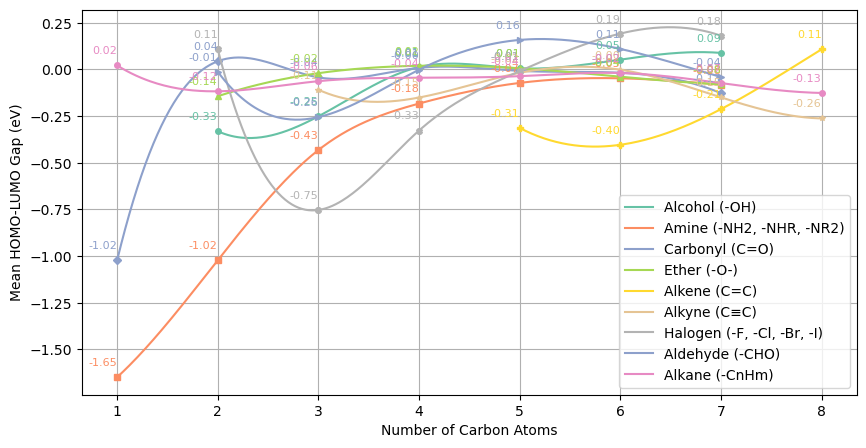

In [893]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import interpolate

dataset = ['Alcohol (-OH)', 'Amine (-NH2, -NHR, -NR2)', 'Carbonyl (C=O)',
           'Carboxylic Acid (-COOH)', 'Ether (-O-)', 'Alkene (C=C)',
           'Alkyne (C≡C)', 'Halogen (-F, -Cl, -Br, -I)', 'Nitro (-NO2)',
           'Sulfide (-S-)', 'Aldehyde (-CHO)', 'Alkane (-CnHm)']

# Sort the dataframes by carbon_count
dfs = [filtered_rows1, filtered_rows2, filtered_rows3, filtered_rows4,
       filtered_rows5, filtered_rows6, filtered_rows7, filtered_rows8,
       filtered_rows9, filtered_rows10, filtered_rows11, filtered_rows12]
sorted_dfs = [df.sort_values(by="carbon_count") for df in dfs]

# Create the plot
plt.figure(figsize=(10, 5))

# Define a list of colors to distinguish between the datasets
colors = sns.color_palette("Set2", len(dataset))

# Define a list of different markers to cycle through
markers = ["o", "s", "D", "v", "^", "P", "*", "X", "h", "<", ">"]

# Loop through datasets and plot each one
for i, (df, label) in enumerate(zip(dfs, dataset)):
    # Group by carbon_count and calculate the mean of homo_lumo_gap for each carbon_count
    grouped = df.groupby("carbon_count")["homo_lumo_gap"].mean().reset_index()

    marker = markers[i % len(markers)]
    
    # Check for NaN or duplicate values in carbon_count and homo_lumo_gap
    grouped = grouped.dropna()  # Remove rows with NaN values
    grouped = grouped.drop_duplicates(subset="carbon_count")  # Remove duplicate carbon_count rows

    # Check if the grouped data is empty
    if grouped.empty:
        print(f"Warning: Data for {label} is empty. Skipping this dataset.")
        continue

    # Interpolate the data for smoother lines
    try:
        # f = interpolate.interp1d(grouped["carbon_count"], grouped["homo_lumo_gap"], kind='linear', fill_value="extrapolate")
        f = interpolate.interp1d(grouped["carbon_count"], grouped["homo_lumo_gap"], kind='cubic', fill_value="extrapolate")
        xnew = np.linspace(grouped["carbon_count"].min(), grouped["carbon_count"].max(), 300)
        ynew = f(xnew)

        # Plot the smooth line
        sns.lineplot(x=xnew, y=ynew, 
                     label=label, color=colors[i], errorbar=None)

        # Add markers only at the carbon_count values with alternating markers
        for j, (x, y) in enumerate(zip(grouped["carbon_count"], grouped["homo_lumo_gap"])):
            # marker = "o" if j % 2 == 0 else "s"  # Alternating marker
            plt.plot(x, y, marker=marker, color=colors[i], markersize=4)

        # Add the mean value only at the markers (points with markers)
        for x, y in zip(grouped["carbon_count"], grouped["homo_lumo_gap"]):
            plt.text(x, y + 0.05, f'{y:.2f}', color=colors[i], fontsize=8, ha='right', va='bottom')

    except ValueError as e:
        print(f"Error interpolating data for {label}: {e}")
        continue

# Labels and title
plt.xlabel("Number of Carbon Atoms")
plt.ylabel("Mean HOMO-LUMO Gap (eV)")
# plt.title("Mean HOMO-LUMO Gap vs Carbon Count for Non-PAH (No Rings) and Various Functional Groups")
plt.legend()  # Show legend
plt.grid(True)

# Save the figure
plt.savefig("/media/omid/HDD2/QM9_sci/homo_lumo_gap_vs_carbon_count_Non-PAH_0_aromatic_rings_all_total_rings.png", dpi=300, bbox_inches="tight")
# plt.savefig("/media/omid/HDD2/QM9_sci/homo_lumo_gap_vs_carbon_count_PAH-1_Single Benzene_all_aromatic_rings.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

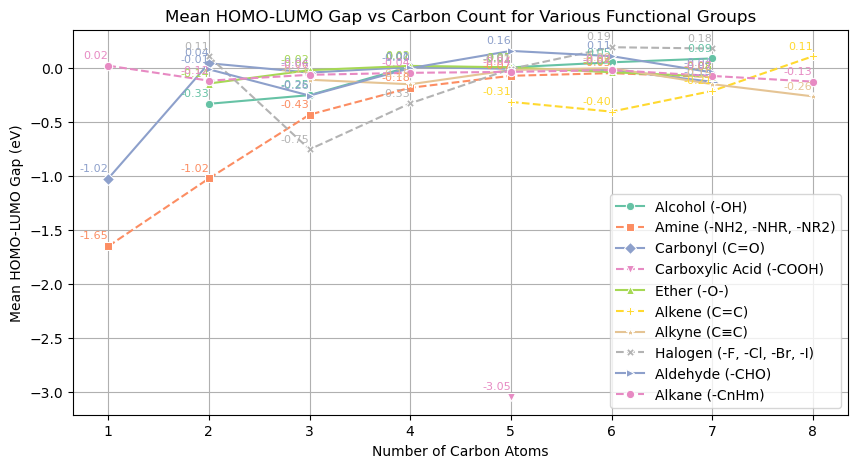

In [894]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset = ['Alcohol (-OH)', 'Amine (-NH2, -NHR, -NR2)', 'Carbonyl (C=O)',
           'Carboxylic Acid (-COOH)', 'Ether (-O-)', 'Alkene (C=C)',
           'Alkyne (C≡C)', 'Halogen (-F, -Cl, -Br, -I)', 'Nitro (-NO2)',
           'Sulfide (-S-)', 'Aldehyde (-CHO)', 'Alkane (-CnHm)']

# Sort the dataframes by carbon_count
dfs = [filtered_rows1, filtered_rows2, filtered_rows3, filtered_rows4,
       filtered_rows5, filtered_rows6, filtered_rows7, filtered_rows8,
       filtered_rows9, filtered_rows10, filtered_rows11, filtered_rows12]

sorted_dfs = [df.sort_values(by="carbon_count") for df in dfs]

# Create the plot
plt.figure(figsize=(10, 5))

# Define a list of colors to distinguish between the datasets
colors = sns.color_palette("Set2", len(dataset))

# Define a list of different markers to cycle through
markers = ["o", "s", "D", "v", "^", "P", "*", "X", "h", "<", ">"]

# Loop through datasets and plot each one
for i, (df, label) in enumerate(zip(dfs, dataset)):
    # Group by carbon_count and calculate the mean of homo_lumo_gap for each carbon_count
    grouped = df.groupby("carbon_count")["homo_lumo_gap"].mean().reset_index()

    # Select a marker from the list, cycling through if there are more datasets than markers
    marker = markers[i % len(markers)]

    # Plot the data
    sns.lineplot(x=grouped["carbon_count"], y=grouped["homo_lumo_gap"],
                 marker=marker,
                 # marker="o" if i % 2 == 0 else "s", 
                 linestyle="-" if i % 2 == 0 else "--", 
                 label=label, color=colors[i], errorbar=None)

    # Add the mean value only at the markers (points with markers)
    for x, y in zip(grouped["carbon_count"], grouped["homo_lumo_gap"]):
        plt.text(x, y + 0.05, f'{y:.2f}', color=colors[i], fontsize=8, ha='right', va='bottom')

# Labels and title
plt.xlabel("Number of Carbon Atoms")
plt.ylabel("Mean HOMO-LUMO Gap (eV)")
plt.title("Mean HOMO-LUMO Gap vs Carbon Count for Various Functional Groups")
plt.legend()  # Show legend
plt.grid(True)

plt.savefig("/media/omid/HDD2/QM9_sci/homo_lumo_gap_vs_carbon_count_Non-PAH_1_aromatic_rings_all_total_rings.png", dpi=300, bbox_inches="tight")
# plt.savefig("/media/omid/HDD2/QM9_sci/homo_lumo_gap_vs_carbon_count_PAH-1_Single Benzene_all_aromatic_rings.png", dpi=300, bbox_inches="tight")


# Show plot
plt.show()

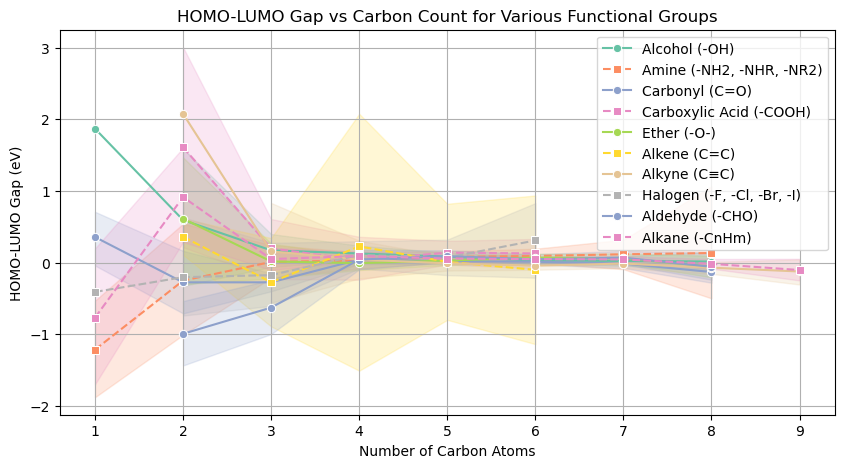

In [813]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset = ['Alcohol (-OH)', 'Amine (-NH2, -NHR, -NR2)', 'Carbonyl (C=O)',
           'Carboxylic Acid (-COOH)', 'Ether (-O-)', 'Alkene (C=C)',
           'Alkyne (C≡C)', 'Halogen (-F, -Cl, -Br, -I)', 'Nitro (-NO2)',
           'Sulfide (-S-)', 'Aldehyde (-CHO)', 'Alkane (-CnHm)']

# Sort the dataframes by carbon_count
dfs = [filtered_rows1, filtered_rows2, filtered_rows3, filtered_rows4,
       filtered_rows5, filtered_rows6, filtered_rows7, filtered_rows8,
       filtered_rows9, filtered_rows10, filtered_rows11, filtered_rows12]
sorted_dfs = [df.sort_values(by="carbon_count") for df in dfs]

# Create the plot
plt.figure(figsize=(10, 5))

# Define a list of colors to distinguish between the datasets
colors = sns.color_palette("Set2", len(dataset))

# Loop through datasets and plot each one
for i, (df, label) in enumerate(zip(sorted_dfs, dataset)):
    sns.lineplot(x=df["carbon_count"], y=df["homo_lumo_gap"], 
                 marker="o" if i % 2 == 0 else "s", 
                 linestyle="-" if i % 2 == 0 else "--", 
                 label=label, color=colors[i])

# Labels and title
plt.xlabel("Number of Carbon Atoms")
plt.ylabel("HOMO-LUMO Gap (eV)")
plt.title("HOMO-LUMO Gap vs Carbon Count for Various Functional Groups")
plt.legend()  # Show legend
plt.grid(True)

# Show plot
plt.show()


## Using the SHAP TreeExplainer for interpreting feature importance

In [2]:
import pandas as pd

scaled_common_2D_3D_descriptors_QM9_61 = pd.read_csv('/media/omid/HDD2/QM9_sci/scaled_common_2D_3D_descriptors_QM9_61.csv')

X = scaled_common_2D_3D_descriptors_QM9_61.drop(columns=['homo', 'lumo'])
y = scaled_common_2D_3D_descriptors_QM9_61[['homo', 'lumo']]

In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Train Multi-Output RandomForest
multi_rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
multi_rf_model.fit(X, y)

save_path = '/media/omid/HDD2/QM9_sci/'

# Function to compute and save SHAP values
def save_shap_values(model, X, target_name, save_path):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Convert to DataFrame
    shap_df = pd.DataFrame(shap_values, columns=X.columns)

    # Save SHAP values to CSV
    shap_df.to_csv(f"{save_path}/shap_positive_negative_values_{target_name}.csv", index=False)

# Apply function to both targets
# save_shap_values(multi_rf_model.estimators_[0], X, 'homo', save_path)
# save_shap_values(multi_rf_model.estimators_[1], X, 'lumo', save_path)

## SHAP Feature Importance for HOMO and LUMO with Positive and Negative Contributions

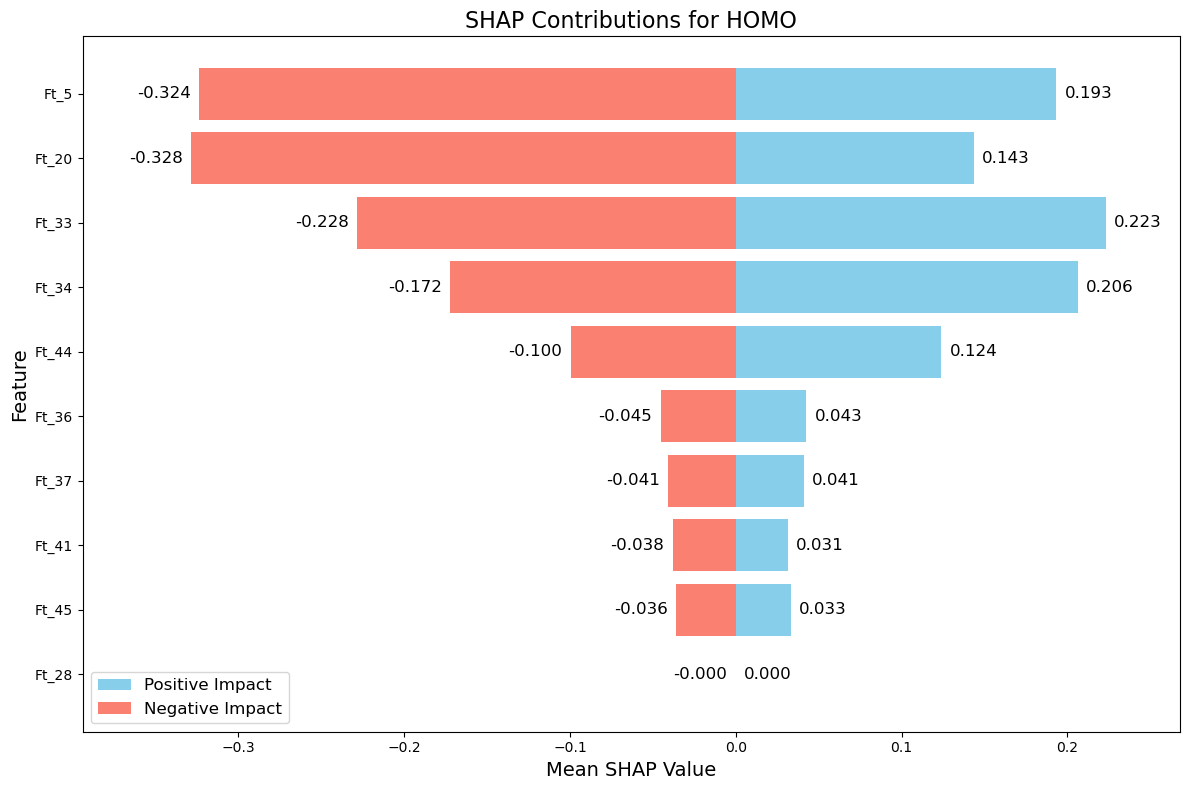

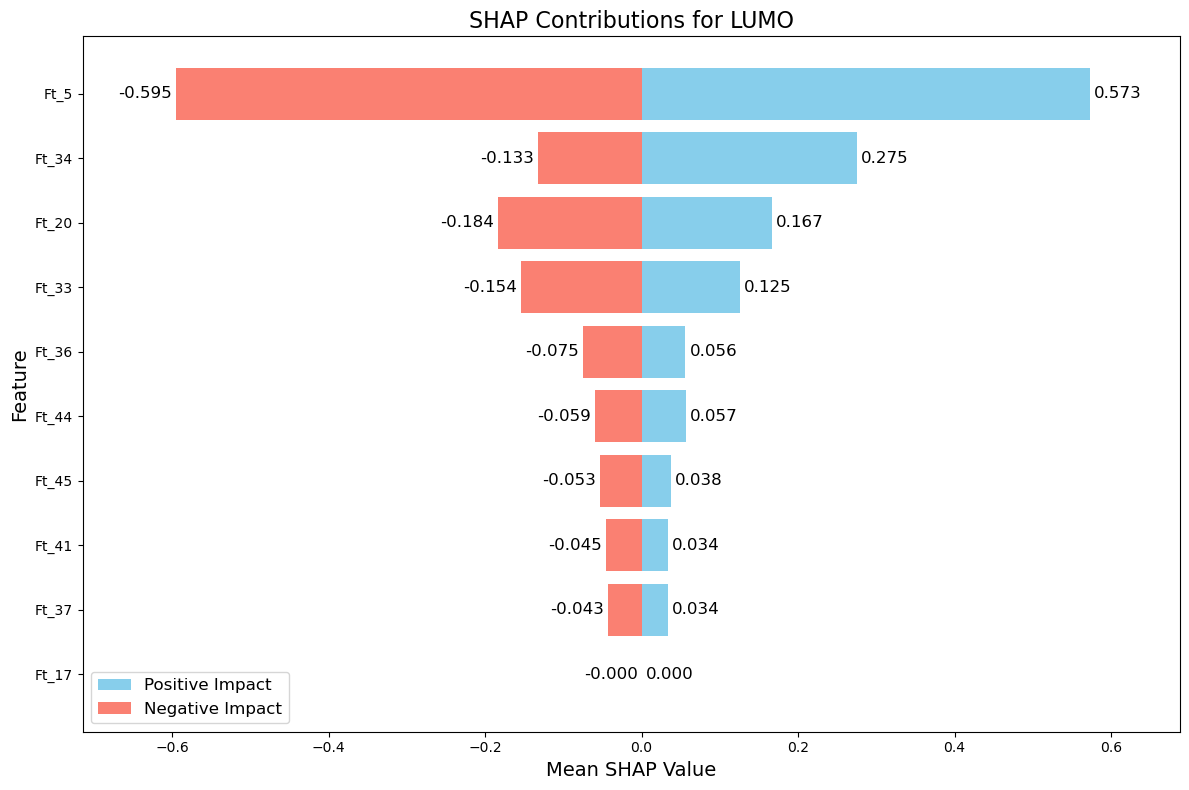

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
save_path = "/media/omid/HDD2/QM9_sci"
homo_csv = f"{save_path}/shap_positive_negative_values_homo.csv"
lumo_csv = f"{save_path}/shap_positive_negative_values_lumo.csv"

# Function to plot SHAP values from CSV with proper spacing
def plot_shap_from_csv(csv_file, target_name):
    # Load SHAP values
    shap_df = pd.read_csv(csv_file)

    # Rename columns to use 'Ft_' as the prefix (changing from 'Feature_' to 'Ft_')
    shap_df.columns = [f"Ft_{i}" for i in range(shap_df.shape[1])]

    # Compute mean positive and negative contributions
    mean_positive = shap_df.apply(lambda x: x[x > 0].mean(), axis=0)
    mean_negative = shap_df.apply(lambda x: x[x < 0].mean(), axis=0)

    # Sort features by absolute impact and select top 10
    sorted_features = (mean_positive.abs() + mean_negative.abs()).sort_values(ascending=False).index[:10]

    # Create figure with larger size and extra padding
    # plt.figure(figsize=(10, 12))  # Increased size
    plt.figure(figsize=(12, 8))  # Increased size
    bars1 = plt.barh(sorted_features, mean_positive[sorted_features], color='skyblue', label='Positive Impact')
    bars2 = plt.barh(sorted_features, mean_negative[sorted_features], color='salmon', label='Negative Impact')

    # Add value labels with more spacing
    for bar in bars1:
        plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", 
                 va='center', fontsize=12, color='black')

    for bar in bars2:
        plt.text(bar.get_width() - 0.005, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", 
                 va='center', fontsize=12, color='black', ha='right')

    # Formatting
    plt.xlabel('Mean SHAP Value', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'SHAP Contributions for {target_name}', fontsize=16)
    plt.legend(fontsize=12)
    plt.gca().invert_yaxis()
    plt.xlim(left=min(mean_negative[sorted_features]) * 1.2, right=max(mean_positive[sorted_features]) * 1.2)  # Extra padding
    
    # Save the plot as a file
    plot_path = save_path + f'shap_feature_importance_positive_negative_{target_name.lower()}_10.png'
    # plot_path = save_path + f'shap_feature_importance_positive_negative_{target_name.lower()}_all.png'
    plt.savefig(plot_path)
    plt.tight_layout()
    
    # Show plot
    plt.show()

# Plot for HOMO
plot_shap_from_csv(homo_csv, "HOMO")

# Plot for LUMO
plot_shap_from_csv(lumo_csv, "LUMO")

## SHAP Feature Importance for HOMO and LUMO Predictions: Top 10 Features Based on Mean SHAP Values

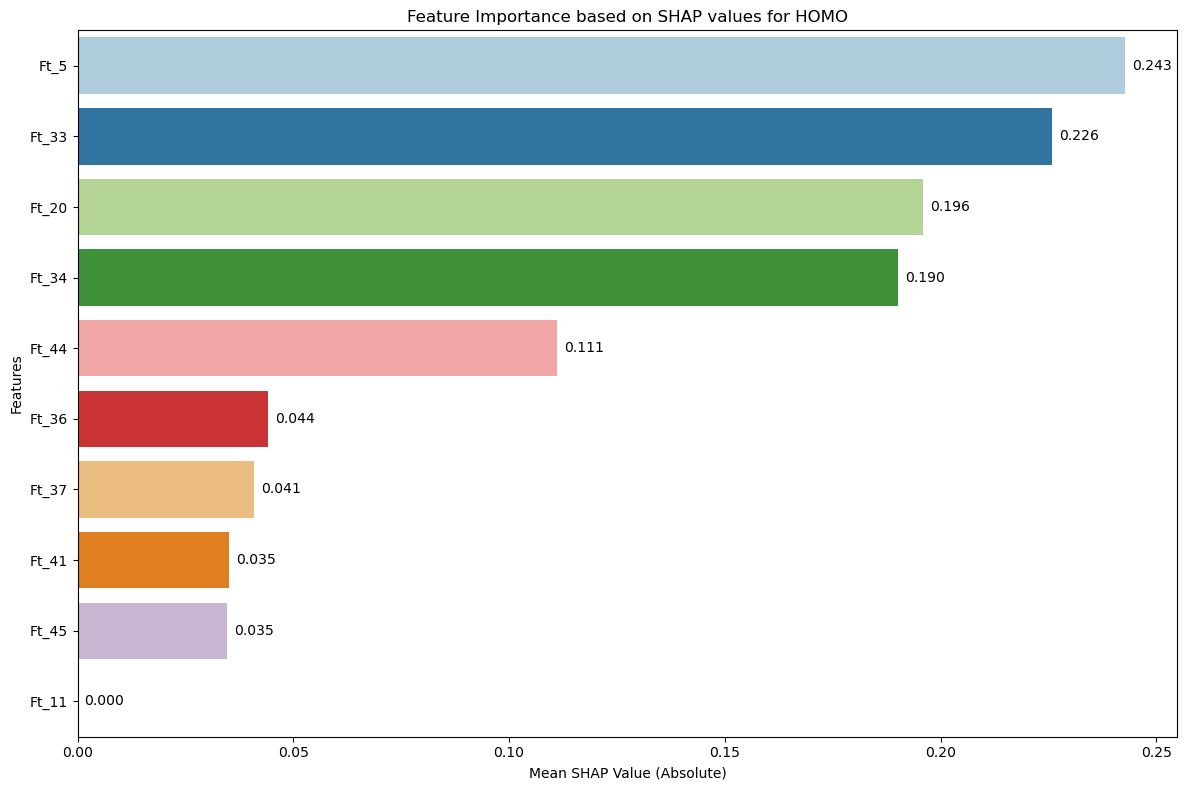

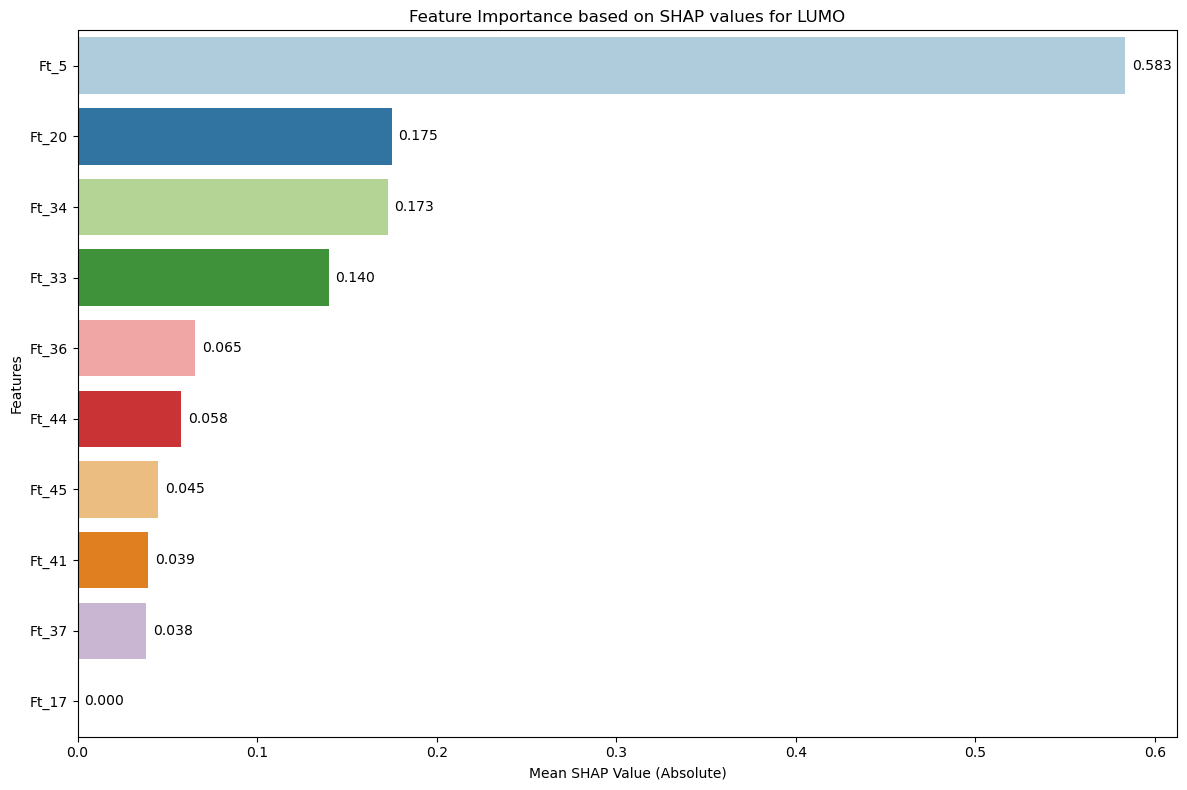

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_shap_feature_importance(shap_csv_file, target_name, save_path):
    """
    Function to generate SHAP feature importance plot for HOMO or LUMO.

    Parameters:
    shap_csv_file (str): Path to the SHAP CSV file.
    target_name (str): The target name (HOMO or LUMO) for the plot.
    save_path (str): The directory path to save the plot.
    """
    # Load the SHAP CSV file
    shap_df = pd.read_csv(shap_csv_file)

    # Rename columns to use 'Ft_' as the prefix (changing from 'Feature_' to 'Ft_')
    shap_df.columns = [f"Ft_{i}" for i in range(shap_df.shape[1])]

    # Remove parentheses and convert to float
    shap_df_cleaned = shap_df.replace({r'\(|\)': ''}, regex=True)

    # Convert all columns to numeric (ignoring errors for any non-numeric data)
    shap_df_cleaned = shap_df_cleaned.apply(pd.to_numeric, errors='coerce')

    # Calculate the mean absolute SHAP values for each feature
    mean_shap_values = shap_df_cleaned.abs().mean()

    # Sort the values by importance (descending order)
    sorted_features = mean_shap_values.sort_values(ascending=False)

    # Select only the top 10 features
    top_10_features = sorted_features.head(10)

    # Plot using seaborn with a different palette
    plt.figure(figsize=(12, 8))  # Adjusting the figure size
    # plt.figure(figsize=(10, 12))  # Adjusting the figure size
    ax = sns.barplot(x=top_10_features.values, y=top_10_features.index, hue=top_10_features.index, palette='Paired', legend=False)

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.3f}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='left', va='center', 
                    fontsize=10, color='black', 
                    xytext=(5, 0), textcoords='offset points')

    # Set plot title and labels
    # plt.title(f'Top 10 Feature Importance based on SHAP values for {target_name}')
    plt.title(f'Feature Importance based on SHAP values for {target_name}')
    plt.xlabel('Mean SHAP Value (Absolute)')
    plt.ylabel('Features')

    # Save the plot as a file
    plot_path = save_path + f'shap_feature_importance_{target_name.lower()}_10.png'
    # plot_path = save_path + f'shap_feature_importance_{target_name.lower()}_all.png'
    plt.savefig(plot_path)

    plt.tight_layout()
    plt.show()


# Define the save path for the plots
save_path = '/media/omid/HDD2/QM9_sci'

# File paths for HOMO and LUMO SHAP data
homo_csv = f'{save_path}/shap_positive_negative_values_homo.csv'
lumo_csv = f'{save_path}/shap_positive_negative_values_lumo.csv'

# Plot for HOMO
plot_shap_feature_importance(homo_csv, "HOMO", save_path)

# Plot for LUMO
plot_shap_feature_importance(lumo_csv, "LUMO", save_path)

In [10]:
shap_df = pd.read_csv(homo_csv).head()

fr_amidine  NumHAcceptors       fr_urea         Chi3n         Chi1n  \
0 -2.546062e-20  -6.988022e-19  8.277100e-20  7.026059e-18 -3.261397e-09   
1  7.851598e-21  -9.551951e-20  5.254251e-21 -1.035577e-18 -3.743854e-09   
2 -1.422751e-22  -5.278603e-18  6.524801e-21  2.302156e-18 -3.743854e-09   
3 -2.260188e-20  -2.612038e-19  6.628364e-20 -2.287518e-18 -3.261397e-09   
4  2.928219e-21  -2.817609e-19  4.013480e-21  3.389720e-19 -3.743854e-09   

       zpve           Ipc         Chi1v      SMR_VSA2  fr_nitroso  ...  \
0 -2.976531 -1.432809e-19  5.052868e-07  5.796807e-19         0.0  ...   
1 -1.339957 -7.853319e-19  6.817055e-07 -2.205536e-19         0.0  ...   
2 -3.041691 -5.035743e-18  6.845666e-07  7.659750e-19         0.0  ...   
3 -0.929294 -3.277250e-18  5.054344e-07 -3.633804e-21         0.0  ...   
4 -4.397086 -3.409387e-18  6.845666e-07 -3.471988e-18         0.0  ...   

       u298   EState_VSA7  MaxPartialCharge        cv      h298  \
0 -0.576472  2.232991e-19      4.291072e-08 -0.068140 -0.581213   
1 -0.009755 -2.973615e-19      6.530618e-08 -0.120526  0.018038   
2  0.326178  1.329127e-18      6.530618e-08 -0.016793  0.286432   
3 -0.070313 -4.042994e-19      4.291072e-08 -0.115567 -0.039877   
4 -0.015237 -1.355147e-18      6.530618e-08 -0.040989 -0.025842   

   BCUT2D_LOGPLOW    fr_hdrzone    NumHDonors          Chi1  fr_Ndealkylation1  
0    1.409417e-07 -1.287093e-21 -8.986457e-19  1.572130e-10       4.234503e-20  
1    1.892982e-07 -5.972244e-22  3.959879e-20  1.805594e-10       1.841370e-19  
2   -4.925051e-08 -2.264821e-21 -2.393239e-18  1.805594e-10       3.275503e-19  
3    1.266671e-07 -1.301982e-21 -6.098108e-19  1.572130e-10      -3.655543e-19  
4   -4.925051e-08 -1.981925e-21  7.480201e-18  1.805594e-10      -1.290832e-18  

[5 rows x 51 columns]

## Column Renaming and Mapping for SHAP Values

In [15]:
import pandas as pd

# Load the SHAP values CSV file
shap_ddf = pd.read_csv(homo_csv)

# Create a mapping of original column names to the new ones with 'Ft_' prefix
column_mapping = {orig: f"Ft_{i}" for i, orig in enumerate(shap_ddf.columns)}

# Create a DataFrame to display the mapping
column_mapping_df = pd.DataFrame(list(column_mapping.items()), columns=['Original Column', 'Renamed Column'])


# Define the path where the CSV will be saved
save_path = '/media/omid/HDD2/QM9_sci/'

# Save the column mapping DataFrame as a CSV file
column_mapping_df.to_csv(f"{save_path}/column_mapping.csv", index=False)

column_mapping_df

Original Column Renamed Column
0              fr_amidine           Ft_0
1           NumHAcceptors           Ft_1
2                 fr_urea           Ft_2
3                   Chi3n           Ft_3
4                   Chi1n           Ft_4
5                    zpve           Ft_5
6                     Ipc           Ft_6
7                   Chi1v           Ft_7
8                SMR_VSA2           Ft_8
9              fr_nitroso           Ft_9
10              fr_phenol          Ft_10
11           BCUT2D_MRLOW          Ft_11
12            VSA_EState4          Ft_12
13              PEOE_VSA2          Ft_13
14       fr_unbrch_alkane          Ft_14
15              SASA (Å²)          Ft_15
16              PEOE_VSA5          Ft_16
17             SlogP_VSA1          Ft_17
18                BertzCT          Ft_18
19               fr_amide          Ft_19
20                     mu          Ft_20
21               BalabanJ          Ft_21
22       Steric Hindrance          Ft_22
23            fr_priamide          Ft_23
24               fr_ester          Ft_24
25           fr_C_O_noCOO          Ft_25
26                 fr_azo          Ft_26
27                 fr_NH1          Ft_27
28                  Chi3v          Ft_28
29  fr_para_hydroxylation          Ft_29
30            EState_VSA2          Ft_30
31                    qed          Ft_31
32                fr_COO2          Ft_32
33                  alpha          Ft_33
34                     r2          Ft_34
35             fr_epoxide          Ft_35
36                   g298          Ft_36
37                     u0          Ft_37
38             PEOE_VSA11          Ft_38
39          fr_morpholine          Ft_39
40                 Kappa1          Ft_40
41                   u298          Ft_41
42            EState_VSA7          Ft_42
43       MaxPartialCharge          Ft_43
44                     cv          Ft_44
45                   h298          Ft_45
46         BCUT2D_LOGPLOW          Ft_46
47             fr_hdrzone          Ft_47
48             NumHDonors          Ft_48
49                   Chi1          Ft_49
50      fr_Ndealkylation1          Ft_50